# ДЗ3. VQA Challenge (Kaggle-соревнование)

## Введение

В этом задании вы будете решать задачу **визуального вопрос–ответа (Visual Question Answering, VQA)** и отправлять предсказания на [Kaggle](https://www.kaggle.com/t/aa85575c6aac46a490e96e796f67bf98).

**Цель:** построить модель, которая по изображению и тексту вопроса предсказывает текст ответа  
(либо специальный токен `no_answer`, если по картинке ответить невозможно).

Все данные находся на [Google Disk](https://drive.google.com/drive/folders/19MD9wXcQ6sL_Tu8xmcfQjhmaGio7FDKE?usp=sharing), формальное описание задачи доступны в [закрытом соревновании](https://www.kaggle.com/t/aa85575c6aac46a490e96e796f67bf98) на Kaggle.  
Это же ДЗ - про то, как аккуратно и воспроизводимо построить решение.

Метрика качества: **Accuracy** (доля правильно предсказанных ответов).

Подробная разбалловка за ноутбук и соревнование описана ниже.

Вот несколько правил, которые помогут нам сделать работу приятнее и продуктивнее:

- Можно использовать любые свободные источники с обязательным указанием ссылки на них. Если в работе вы используете генеративные модели для написания кода, их указание обязательно. Иначе баллы за работу могут быть снижены. Также следите за оригинальностью: сгенерированного кода должно быть **не более 60%** работы.

- Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

- Старайтесь сделать код как можно более оптимальным.


### Формат сдачи

Задания сдаются через систему Anytask. Посылка должна содержать:

- ноутбук `homework-03-Username.ipynb`  
  где `Username` - ваша фамилия латиницей, без пробелов (например, `homework-03-Ivanov.ipynb`);
- комментарий к посылке, в котором укажите ваш **Kaggle nickname** (по нему мы будем искать вас в лидерборде соревнования).

> Если вы используете дополнительные файлы (скрипты, сохранённые веса модели и т.п.), то либо:
> - делайте так, чтобы ноутбук мог их скачать сам (например, с Kaggle Datasets / Google Drive),  
> - либо приложите их архивом и явно опишите в ноутбуке, как ими пользоваться.  
>
> В идеале всё должно работать **без ручных правок путей**.

### Об оценивании

В этом домашнем задании у вас есть два источника баллов:

1. Баллы за ноутбук (за код, воспроизводимость и эксперименты)
2. Баллы за результат на Kaggle (Public Leaderboard)

Важно: баллы за соревнование начисляются только при сданном ноутбуке.

**1) Баллы за ноутбук (максимум 8.0 баллов)**

За реализацию пайплайна в этом ноутбуке можно получить до 8 баллов.

Минимальная работа - 5.0 баллов.  
Вы получаете 5 баллов, если ноутбук:

* запускается без ручных правок,
* делает подготовку данных (чтение CSV + загрузка изображений),
* обучает и/или применяет модель (baseline),
* формирует корректный `submission.csv`,
* и вы сдаёте этот ноутбук в Anytask.

Дальше можно добрать баллы:

* **+1.0 балл** - если вы преодолели минимальный бенчмарк на Kaggle  
  (Public Accuracy ≥ `B_min`).
* **+1.0 балл** - за осмысленные эксперименты: сравнения подходов  
  (несколько моделей/архитектур/фичей, таблица результатов + короткие выводы, что помогло и почему).
* **+1.0 балл** - если вы преодолели сильный бенчмарк на Kaggle  
  (Public Accuracy ≥ `B_strong`).

> Пороговые значения **`B_min`** и **`B_strong`** будут указаны на странице Kaggle.


**2) Баллы за соревнование на Kaggle (до 2.0 баллов)**

Дополнительные баллы начисляются по вашему лучшему результату на лидерборде и только если у вас сдан воспроизводимый ноутбук.

Баллы состоят из двух независимых бонусов:

**A. Бонус за попадание в топ-10:**

* Если вы попали в топ-10 по лидерборду -> **+1.0 балл**

**B. Бонус за попадание в топ-2%:**

* Если вы попали в топ-2% по лидерборду -> **+1.0 балл**

Таким образом:

* участник из топ-10 получит **+1**,
* участник из топ-2% получит ещё **+1**,
* участник, который одновременно в топ-10 и топ-2%, получит **+2**.

> Примечание: топ-2% считается от числа участников, сдавших хотя бы один валидный сабмит.  
> Если 2% - дробное число, округляем вверх (например, при 120 участниках топ-2% = топ-3 места).

**Суммарно за ДЗ2**

* Максимум за ноутбук: **8.0**
* Максимум за Kaggle-бонусы: **2.0**
* Максимальная оценка за ДЗ2: **10.0**

### Требование к воспроизводимости

В конце ноутбука у вас должен быть отдельный блок **"Воспроизводимый пайплайн"** с одной кодовой ячейкой, которая из исходных данных собирает финальный `submission.csv` для Kaggle.

Эта ячейка должна воспроизводить ваш итоговый результат. Если финальная модель обучалась долго, допускается загружать заранее сохранённые веса, а не обучать модель с нуля.

## Основная часть работы (5 баллов)

### Сеттинг и данные

Вам доступны:

- `train.csv` - обучающая выборка
- `test.csv` - тестовая выборка
- `sample_submission.csv` - пример файла посылки
- папка `images/` - изображения (файлы `photo_*.jpg`)

Формат `train.csv`:

- `ID` - строковый идентификатор вопроса;
- `image` - имя файла изображения (например, `photo_000123.jpg`);
- `question` - текст вопроса на английском;
- `answer` - целевой ответ (короткая строка)  
  или специальное значение `no_answer`, если по изображению ответить нельзя.

Формат `test.csv`:

- `ID` - идентификатор вопроса;
- `image` - имя файла изображения;
- `question` -текст вопроса.

Формат `sample_submission.csv`:

- `ID` - идентификатор вопроса (как в `test.csv`);
- `answer` - заглушка `"your answer"`.

Ваша задача - для каждого объекта из `test.csv` предсказать `answer`.

[Данные доступны здесь](https://drive.google.com/drive/folders/19MD9wXcQ6sL_Tu8xmcfQjhmaGio7FDKE?usp=drive_link).

### Сразу и скачаем...

Google Drive ограничивает число скачиваний, поэтому (для воспроизводимости)
загрузил данные на Yandex Object Storage и открыл публичный доступ.


In [ ]:
# !curl https://storage.yandexcloud.net/hse-ai24-mm-hw3-data/course_vqa_dataset.zip -o data/course_vqa_dataset.zip
# !unzip -nq data/course_vqa_dataset.zip -d data/course_vqa_dataset

In [102]:
import os
# Отключаем предупреждения о параллелизме tokenizers при использовании DataLoader с num_workers > 0
os.environ['TOKENIZERS_PARALLELISM'] = 'false'

import re
import clip
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as T
import pytorch_lightning as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from PIL import Image
from pathlib import Path
from collections import Counter
from torchvision import models
from torchmetrics import Accuracy
from torch.nn import MultiheadAttention
from transformers import AutoTokenizer, AutoModel
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from pytorch_lightning.loggers import CSVLogger, TensorBoardLogger
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping, LearningRateMonitor


DATA_DIR = Path("./data/course_vqa_dataset")
assert DATA_DIR.exists(), "Скачайте и распакуйте данные (предыдущая ячейка)"

IMAGES_DIR = DATA_DIR / "images"
TRAIN_PATH = DATA_DIR / "train.csv"
TEST_PATH = DATA_DIR / "test.csv"
SAMPLE_SUB_PATH = DATA_DIR / "sample_submission.csv"


### Задание 1. Подготовка данных и первичный EDA (1 балл)

**Цель этого раздела** - не просто убедиться, что файлы читаются, а получить интуитивное понимание задачи:

- каков масштаб датасета (сколько объектов в train/test);
- как устроено пространство ответов (`answer`): насколько оно дисбалансно, есть ли длинный хвост и другое;
- как в целом выглядит типичный объект: связка "картинка - вопрос - ответ".

После этого блока вы должны понимать, *что именно мы просим модель предсказывать* насколько это больше похоже на классификацию по фиксированным меткам или на задачу генерации коротких текстов.

> Далее пойдет отдельный раздел для более углубленного анализа данных. Но если вы хотите, можно оформить всё в одном блоке.
>
> Как всегда, вы абсолютно не ограничены в подходах. Главное - вытащить из анализа то, что в итоге повлияет на вашу стратегию.


#### Шаг 1. Загрузка данных и первичный осмотр

In [3]:
# базовое исследование данных и распределений
# your code here ฅ^•ﻌ•^ฅ

train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)
sample_sub = pd.read_csv(SAMPLE_SUB_PATH)

print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Sample submission shape:", sample_sub.shape)

print("\nTrain info:")
print(train.info())

print("\nTest info:")
print(test.info())

print("\nКоличество уникальных ID в train:", train["ID"].nunique())
print("Количество уникальных ID в test:", test["ID"].nunique())


Train shape: (19873, 4)
Test shape: (4969, 3)
Sample submission shape: (4969, 2)

Train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19873 entries, 0 to 19872
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        19873 non-null  object
 1   image     19873 non-null  object
 2   question  19873 non-null  object
 3   answer    19873 non-null  object
dtypes: object(4)
memory usage: 621.2+ KB
None

Test info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4969 entries, 0 to 4968
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        4969 non-null   object
 1   image     4969 non-null   object
 2   question  4969 non-null   object
dtypes: object(3)
memory usage: 116.6+ KB
None

Количество уникальных ID в train: 19873
Количество уникальных ID в test: 4969


#### Шаг 2. Анализ пространства ответов (answer)

Число уникальных ответов: 5524

Топ-50 самых частых ответов:
answer
no_answer          7059
no                  512
yes                 474
white               279
grey                269
blue                219
black               215
red                 120
brown               103
pink                 94
keyboard             87
green                76
laptop               66
dog                  65
phone                61
purple               60
soup                 52
nothing              47
yellow               47
coca cola            46
cell phone           44
wine                 41
remote               40
lotion               40
corn                 38
orange               37
computer screen      35
computer             35
chair                34
tan                  33
beer                 31
tv                   30
coffee               29
cereal               29
pepsi                29
remote control       26
chicken              25
green beans          25
black white         

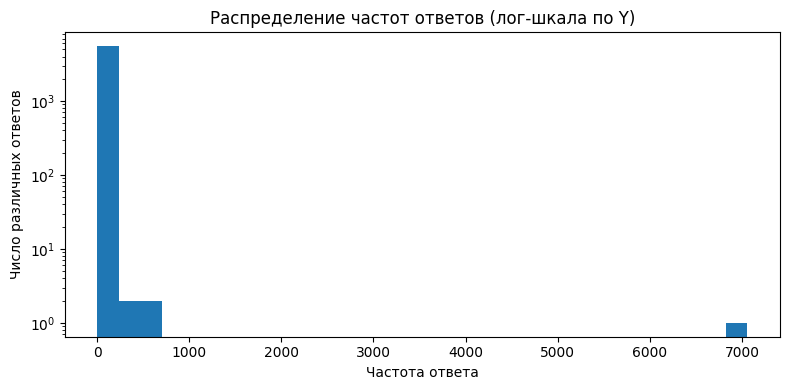

In [4]:
# число уникальных ответов
n_unique_answers = train["answer"].nunique()
print("Число уникальных ответов:", n_unique_answers)

# топ-20 самых частых ответов
answer_counts = train["answer"].value_counts()
print("\nТоп-50 самых частых ответов:")
print(answer_counts.head(50))

# доля самого частого ответа и топ-20
total = len(train)
top1_frac = answer_counts.iloc[0] / total
top50_frac = answer_counts.iloc[:50].sum() / total

print(f"\nДоля самого частого ответа (no_answer): {top1_frac:.3f}")
print(f"Доля топ-50 ответов: {top50_frac:.3f}")

# распределение частот ответов (лог-шкала по оси Y)
plt.figure(figsize=(8, 4))
plt.hist(answer_counts.values, bins=30, log=True)
# sns.histplot(answer_counts.values, bins=30, log_scale=(False, True))
plt.xlabel("Частота ответа")
plt.ylabel("Число различных ответов")
plt.title("Распределение частот ответов (лог-шкала по Y)")
plt.tight_layout()
plt.show()

In [5]:
# сколько ответов встречается ровно 1 раз
answer_counts.loc[answer_counts == 1].sum()

4250

Уже видно, что это многоклассовая задача с огромным хвостом редких ответов и очень частым no_answer.

#### Шаг 3. Картинка–вопрос–ответ (визуальный осмотр)

Случайные примеры из train:


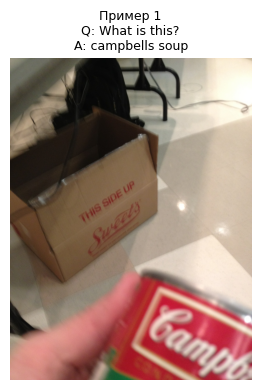

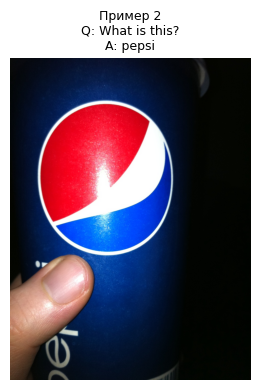

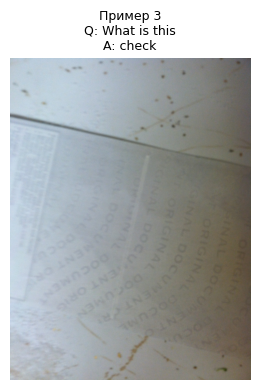

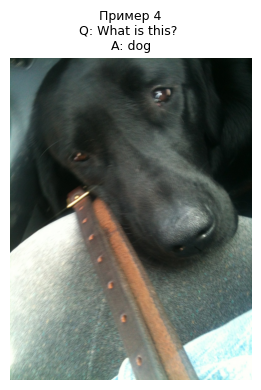


Примеры с no_answer:


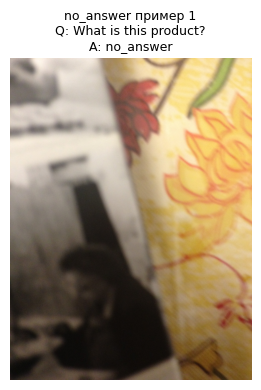

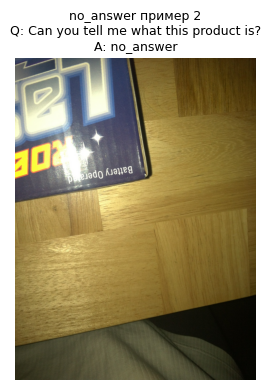

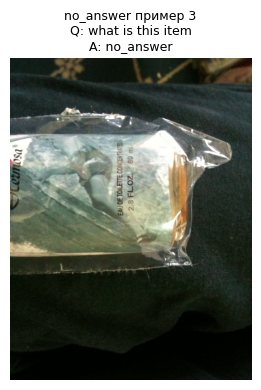

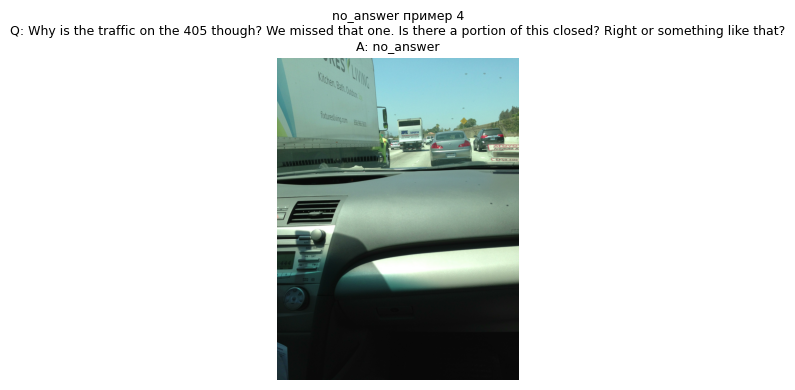

In [6]:
def show_example(row, title_prefix="Пример"):
    img_path = IMAGES_DIR / row["image"]
    img = Image.open(img_path).convert("RGB")

    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis("off")
    plt.title(
        f"{title_prefix}\nQ: {row['question']}\nA: {row['answer']}",
        fontsize=9
    )
    plt.tight_layout()
    plt.show()


random_state=None

# несколько случайных примеров
print("Случайные примеры из train:")
sample_rows = train.sample(4, random_state=random_state)
for i, (_, row) in enumerate(sample_rows.iterrows(), start=1):
    show_example(row, title_prefix=f"Пример {i}")

# примеры с no_answer (если есть)
no_answer_rows = train[train["answer"] == "no_answer"].sample(4, random_state=random_state)
print("\nПримеры с no_answer:")
for i, (_, row) in enumerate(no_answer_rows.iterrows(), start=1):
    show_example(row, title_prefix=f"no_answer пример {i}")

#### Итоги по Заданию 1

В обучающей выборке **19873** объектов, в тестовой - **4969**.  
Пропусков в ключевых полях (`image`, `question`, `answer`) нет.

Пространство ответов достаточно большое: 
- **5524 уникальных ответа**, при сильном дисбалансе
  - ответ `no_answer` встречается примерно в **35%** случаев (7059 примеров)
  - топ-50 (<1%) ответов покрывают около **55%** выборки
- Большая часть ответов - **однословные или очень короткие фразы** (медиана длины = 1 слово)
- Длинный хвост редких и более развёрнутых ответов (4250 ответа встретились ровно 1 раз)

По визуальным примерам видно, что:
- вопросы про конкретный объект/деталь на изображении
- в части случаев ответ можно дать по общему виду сцены/объекта (цвет, тип предмета и т.п.),
- `no_answer` ставится, когда по картинке невозможно однозначно ответить на текстовый вопрос.

В совокупности это скорее **многоклассовая классификация по фиксированному словарю ответов**, чем полноценная генерация произвольного текста, с учётом частого класса `no_answer` и длинного хвоста редких ответов (возможно, с ограничением словаря или особыми приёмами обработки редких классов).


### Задание 2. Сборка датасета и подготовка к модели (1 балл)

**Цель этого раздела** - привести данные к формату, удобному для обучения и инференса: сделать так, чтобы модель видела каждый объект как связку "изображение - вопрос - целевая метка" через единый интерфейс.

> Конкретный выбор фреймворка, трансформов и текстового энкодера остаётся за вами, важно, чтобы интерфейс был *чётким и воспроизводимым*.


#### Шаг 1. Словарь ответов с `min_freq`

In [7]:
# your code here ヾ(๑╹◡╹)ﾉ
def build_answer_vocab(train_df, min_freq: int = 1, max_word_count: int = 0):
    """
    Строим словарь ответов с опциональной фильтрацией редких.
    Все ответы с частотой < min_freq маппим в 'no_answer'.
    Все ответы с количеством слов > max_word_count маппим в 'no_answer'.
    """
    counts = Counter(train_df["answer"])

    print(f"Исходный размер словаря: {len(counts)}")
    print("Топ-10 самых частых ответов:")
    for ans, cnt in counts.most_common(10):
        print(f"  {ans}: {cnt}")

    # если min_freq > 1, заменим редкие ответы на 'no_answer'
    if min_freq > 1:
        rare_answers = {ans for ans, c in counts.items() if c < min_freq}
        print(f"Редких ответов (freq < {min_freq}): {len(rare_answers)}")
        
        # создаём копию train с заменой редких ответов
        train_df = train_df.copy()
        train_df["answer"] = train_df["answer"].apply(
            lambda x: "no_answer" if x in rare_answers else x
        )
        counts = Counter(train_df["answer"])
    else:
        print("Фильтрация редких ответов отключена (min_freq=1).")

    # если max_word_count > 0, заменим ответы с количеством слов > max_word_count на 'no_answer'
    if max_word_count > 0:
        print(f"Фильтрация ответов по количеству слов: {max_word_count} слов")
        train_df = train_df.copy()
        train_df["answer"] = train_df["answer"].apply(
            lambda x: "no_answer" if len(x.split()) > max_word_count else x
        )
        counts = Counter(train_df["answer"])
    else:
        print("Фильтрация ответов по количеству слов отключена (max_word_count=0).")
    
    answers = sorted(counts.keys())
    answer2id = {ans: idx for idx, ans in enumerate(answers)}
    id2answer = {idx: ans for ans, idx in answer2id.items()}
    
    print(f"Финальный размер словаря ответов: {len(answer2id)}")
    print(f"Частота 'no_answer': {counts.get('no_answer', 0)}")
    print(f"Доля 'no_answer': {counts.get('no_answer', 0) / len(train_df):.3f}")

    return answer2id, id2answer, train_df

In [8]:
MAX_WORD_COUNT = 14
answer2id, id2answer, train_processed = build_answer_vocab(train, min_freq=1, max_word_count=MAX_WORD_COUNT)

Исходный размер словаря: 5524
Топ-10 самых частых ответов:
  no_answer: 7059
  no: 512
  yes: 474
  white: 279
  grey: 269
  blue: 219
  black: 215
  red: 120
  brown: 103
  pink: 94
Фильтрация редких ответов отключена (min_freq=1).
Фильтрация ответов по количеству слов: 14 слов
Финальный размер словаря ответов: 5522
Частота 'no_answer': 7061
Доля 'no_answer': 0.355


#### Шаг 2. Словарь и токенизация для вопросов

In [9]:
PAD_TOKEN = "<pad>"
UNK_TOKEN = "<unk>"

def tokenize(text: str):
    # простой токенайзер: нижний регистр, выкидываем лишнюю пунктуацию, сплит по пробелам
    text = text.lower()
    text = re.sub(r"[^a-z0-9]+", " ", text)
    tokens = text.strip().split()
    return tokens

def build_word_vocab(texts, min_freq: int = 1, max_size: int | None = None):
    counter = Counter()
    for t in texts:
        counter.update(tokenize(t))
    
    # отфильтруем по частоте
    words_and_counts = [(w, c) for w, c in counter.items() if c >= min_freq]
    # отсортируем убыванию по частоте
    words_and_counts.sort(key=lambda x: x[1], reverse=True)
    # если задан max_size, отсечем лишние
    if max_size is not None:
        words_and_counts = words_and_counts[:max_size]
    
    vocab_words = [w for w, _ in words_and_counts]
    
    # добавим спец-токены
    word2id = {
        PAD_TOKEN: 0,
        UNK_TOKEN: 1,
    }
    for w in vocab_words:
        if w not in word2id:
            word2id[w] = len(word2id)  # текущий размер словара станет id нового слова
    
    id2word = {i: w for w, i in word2id.items()}
    
    print(f"Размер словаря вопросов (включая спец-токены): {len(word2id)}")
    return word2id, id2word

def encode_question(text: str, word2id: dict, max_len: int = 20):
    tokens = tokenize(text)
    ids = []
    for tok in tokens[:max_len]:
        ids.append(word2id.get(tok, word2id[UNK_TOKEN]))
    # паддинг
    if len(ids) < max_len:
        ids += [word2id[PAD_TOKEN]] * (max_len - len(ids))
    return torch.tensor(ids, dtype=torch.long)

In [10]:
word2id, id2word = build_word_vocab(train_processed["question"], min_freq=2)

Размер словаря вопросов (включая спец-токены): 2102


In [11]:
# sanity-check
example_q = train_processed["question"].iloc[0]
print("Пример вопроса:", example_q)
encoded = encode_question(example_q, word2id, max_len=20)
print("Индексы:", encoded)
print("Декод:", [id2word.get(i, "?") for i in encoded.tolist()])

Пример вопроса: Can you tell me what this bottle says? I need to know what medicine it is and how to use it. Thank you.
Индексы: tensor([  8,   7,  15,  14,   2,   3,  37,  74,  13,  60,  22,  43,   2, 167,
         12,   4,  24,  34,  22, 257])
Декод: ['can', 'you', 'tell', 'me', 'what', 'this', 'bottle', 'says', 'i', 'need', 'to', 'know', 'what', 'medicine', 'it', 'is', 'and', 'how', 'to', 'use']


#### Шаг 3. Реализуем `VQADataset`

In [ ]:
class VQADataset(Dataset):
    def __init__(
        self,
        df,
        images_dir,
        word2id,  # может быть None, если use_bert=True
        answer2id=None,
        max_question_len: int = 20,  # не важно, если use_bert=True
        is_train: bool = True,
        image_size: int = 224,
        use_bert: bool = False,  # Если используем BERT для вопросов
        augment: bool = False,  # аугментации только для train (но val тоже может быть is_train=True)
        image_normalization: str = "imagenet",  # "imagenet" | "clip"
    ):
        self.df = df.reset_index(drop=True)
        self.images_dir = images_dir
        self.word2id = word2id
        self.answer2id = answer2id
        self.max_question_len = max_question_len
        self.is_train = is_train
        self.use_bert = use_bert
        self.augment = augment

        if image_normalization not in {"imagenet", "clip"}:
            raise ValueError(f"image_normalization must be 'imagenet' or 'clip', got: {image_normalization}")

        # Нормализация: важно для CLIP (mean/std отличаются от ImageNet)
        if image_normalization == "clip":
            mean = (0.48145466, 0.4578275, 0.40821073)
            std = (0.26862954, 0.26130258, 0.27577711)
        else:
            mean = (0.485, 0.456, 0.406)
            std = (0.229, 0.224, 0.225)

        # Отдельный флаг для аугментаций,
        # Чтобы разделить смысл is_train (есть ли лейблы) и augment (делаем аугментации)
        if self.augment:
            img_tfms = [
                T.RandomResizedCrop(image_size, scale=(0.8, 1.0)),
                T.RandomHorizontalFlip(),
                T.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
            ]
        else:
            img_tfms = [
                T.Resize(image_size),
                T.CenterCrop(image_size),
            ]

        self.transform = T.Compose([
            *img_tfms,
            T.ToTensor(),
            T.Normalize(mean=mean, std=std),
        ])

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx: int):
        row = self.df.iloc[idx]

        # картинка
        img_path = self.images_dir / row["image"]
        img = Image.open(img_path).convert("RGB")
        img_tensor = self.transform(img)

        # вопрос
        question = row["question"]

        if self.use_bert:
            # для BERT возвращаем сам текст вопроса
            question_data = question
        else:
            # Для baseline возвращаем токенизированные индексы
            question_data = encode_question(question, self.word2id, max_len=self.max_question_len)

        if self.is_train:
            assert self.answer2id is not None, "answer2id должен быть задан для train"
            if self.use_bert:
                assert "answer_category" in row and "question_type" in row, \
                    "answer_category и question_type должны быть в row для BERT. Выполните Углубленный EDA."
                answer_category = row["answer_category"]
                question_type = row["question_type"]
            else:
                answer_category = ""
                question_type = ""
            answer_str = row["answer"]
            if answer_str not in self.answer2id:
                answer_str = "no_answer"
            answer_id = self.answer2id[answer_str]
            answer_id = torch.tensor(answer_id, dtype=torch.long)
            return img_tensor, question_data, answer_id, answer_category, question_type
        else:
            qid = row["ID"]
            return img_tensor, question_data, qid, "", ""

In [13]:
# sanity-check

max_ql = MAX_WORD_COUNT

train_dataset = VQADataset(
    df=train_processed,
    images_dir=IMAGES_DIR,
    word2id=word2id,
    answer2id=answer2id,
    max_question_len=max_ql,
    is_train=True,
    use_bert=False,
)

img_tensor, question_ids, answer_id, answer_category, question_type = train_dataset[0]


print("Картинка:", img_tensor.shape, img_tensor.dtype)
if question_ids is torch.Tensor:
    print("Вопрос:", question_ids.shape, question_ids.dtype)
else:
    print("Вопрос:", question_ids)
print("Ответ (id):", answer_id, answer_id.dtype)
print("Ответ (категория):", answer_category)
print("Вопрос (тип):", question_type)

Картинка: torch.Size([3, 224, 224]) torch.float32
Вопрос: tensor([  8,   7,  15,  14,   2,   3,  37,  74,  13,  60,  22,  43,   2, 167])
Ответ (id): tensor(3765) torch.int64
Ответ (категория): 
Вопрос (тип): 


#### Шаг 4. `VQADataModule` для Torch Lightning

In [14]:
class VQADataModule(pl.LightningDataModule):
    def __init__(
        self,
        train_df,
        test_df,
        images_dir,
        word2id,    # может быть None, если use_bert=True
        answer2id,
        max_question_len: int = 20,  # не важно, если use_bert=True
        batch_size: int = 32,
        num_workers: int = 4,
        val_size: float = 0.1,
        random_state: int = 42,
        use_bert: bool = False,  # Если используем BERT для вопросов
        augment_train: bool = True,
        image_normalization: str = "imagenet",  # "imagenet" | "clip"
    ):
        super().__init__()
        self.train_df = train_df
        self.test_df = test_df
        self.images_dir = images_dir
        self.word2id = word2id
        self.answer2id = answer2id
        self.max_question_len = max_question_len
        self.batch_size = batch_size
        self.num_workers = num_workers
        self.val_size = val_size
        self.random_state = random_state
        self.use_bert = use_bert
        self.augment_train = augment_train
        self.image_normalization = image_normalization

        self.train_dataset = None
        self.val_dataset = None
        self.test_dataset = None

    def setup(self, stage=None):
        # разбиваем train на train/val один раз
        if self.train_dataset is None or self.val_dataset is None:
            _train_df, _val_df = train_test_split(
                self.train_df,
                test_size=self.val_size,
                random_state=self.random_state,
                shuffle=True,
            )

            self.train_dataset = VQADataset(
                df=_train_df,
                images_dir=self.images_dir,
                word2id=self.word2id,
                answer2id=self.answer2id,
                max_question_len=self.max_question_len,
                is_train=True,
                use_bert=self.use_bert,
                augment=self.augment_train,
                image_normalization=self.image_normalization,
            )

            # Валидация: с лейблами, но без аугментаций
            self.val_dataset = VQADataset(
                df=_val_df,
                images_dir=self.images_dir,
                word2id=self.word2id,
                answer2id=self.answer2id,
                max_question_len=self.max_question_len,
                is_train=True,
                use_bert=self.use_bert,
                augment=False,
                image_normalization=self.image_normalization,
            )

        if self.test_dataset is None:
            self.test_dataset = VQADataset(
                df=self.test_df,
                images_dir=self.images_dir,
                word2id=self.word2id,
                answer2id=None,
                max_question_len=self.max_question_len,
                is_train=False,
                use_bert=self.use_bert,
                augment=False,
                image_normalization=self.image_normalization,
            )

    def train_dataloader(self):
        return DataLoader(
            self.train_dataset,
            batch_size=self.batch_size,
            shuffle=True,
            num_workers=self.num_workers,
            pin_memory=True,
            persistent_workers=True if self.num_workers > 0 else False, # переиспользование воркеров
            prefetch_factor=8,  # предзагрузка батчей
            drop_last=True
        )

    def val_dataloader(self):
        return DataLoader(
            self.val_dataset,
            batch_size=self.batch_size,
            shuffle=False,
            num_workers=self.num_workers,
            pin_memory=True,
            persistent_workers=True if self.num_workers > 0 else False,
            prefetch_factor=8,
        )

    def test_dataloader(self):
        return DataLoader(self.test_dataset,
            batch_size=self.batch_size,
            shuffle=False,
            num_workers=self.num_workers,
            pin_memory=True,
            persistent_workers=True if self.num_workers > 0 else False,
            prefetch_factor=8,
        )


In [15]:
# sanity-check даталоадеров
bs=8
max_ql=MAX_WORD_COUNT
USE_BERT = False

dm = VQADataModule(
    train_df=train_processed,
    test_df=test,
    images_dir=IMAGES_DIR,
    word2id=word2id,
    answer2id=answer2id,
    max_question_len=max_ql,
    batch_size=bs,
    num_workers=2,
    use_bert=USE_BERT,
)

dm.setup("fit")

batch = next(iter(dm.train_dataloader()))
imgs, questions, answers, answer_categories, question_types = batch

assert imgs.shape == (bs, 3, 224, 224)
if USE_BERT:
    assert len(questions) == bs and isinstance(questions[0], str)
else:
    assert questions.shape == (bs, max_ql)
assert answers.shape == (bs,)


dm.setup("test")
test_batch = next(iter(dm.test_dataloader()))
test_imgs, test_questions, test_ids, _, _ = test_batch

assert test_imgs.shape == (bs, 3, 224, 224)
if USE_BERT:
    assert len(test_questions) == bs and isinstance(test_questions[0], str)
else:
    assert test_questions.shape == (bs, max_ql)
assert len(test_ids) == bs

#### Итоги по Заданию 2

- Для ответов 
    - построен словарь `answer2id` / `id2answer` на основе столбца `answer` из `train`
    - заложены возможности (для экспериментов)
        - фильтровать низкочастотные ответы - параметр `min_freq`
        - фильтровать ответы по количеству слов - параметр `max_size` 
- Для вопросов
    - реализован простой BoW-пайплайн: lowercase -> очистка от пунктуации -> токенизация по словам
    - словарь `word2id` с спец‑токенами `<pad>` и `<unk>`
    - функция `encode_question` - переводит вопрос в посл-ть токенов (индексов слов) с паддингом.  
- На основе этих словарей реализован класс `VQADataset` (c заделом на эксперименты):
    - реализует BoW-токенизацию или ничего не делает (для BERT - параметр `use_bert = True`)
    - по индексу возвращает кортеж
        - для train:`(image_tensor, question_ids, answer_id, answer_category, question_type)`
        - для test: `(image_tensor, question_ids, ID, [], [])` 
        - где
            - `question_ids` - либо тензор токенов, либо строка вопроса
            - `answer_category` - категория ответа (для экспериментов)
            - `question_type` - тип вопроса (для экспериментов)
    - приводит изображения к размеру `224×224` и нормализует,

- Буду далее использовать Torch Lightning, поэтому собранл `VQADataModule`
    - делит обучающую выборку на train/val случайным сплитом (без стратификации из‑за огромного числа редких классов), 
    - создаёт соответствующие датасеты и `DataLoader`; 
    
Sanity‑check батчей показывает корректные формы тензоров и согласованный интерфейс для последующей мультимодальной модели в Задании 3.

### Задание 3. Базовый мультимодальный baseline (3 балла)

**Цель этого раздела** - собрать первый рабочий end-to-end pipeline для VQA:от сырых данных до `submission.csv`, который проходит проверку на Kaggle.

К концу задания у вас должно быть:

- согласованная схема разбиения на train/validation;
- определённая модель, которая:
  - получает на вход изображение и текст вопроса,
  - предсказывает ответ/класс;
- измеренная Accuracy на валидации и сохранённые веса модели;
- код, который:
  - запускает инференс на всём `test`,
  - формирует корректный `submission.csv` с колонками `ID,answer`.

> Минимально приемлемый baseline может использовать только текст вопроса, но для более высокой оценки в дальнейшем ожидается использование **мультимодального сигнала** (изображение + вопрос).


#### Шаг 1. Архитектура модели (Lightning Module)

In [16]:
# базовый мультимодальный pipeline: Dataset + модель + валидация + submission
# your code here (づ｡◕‿‿◕｡)づ

class VQABaseline(pl.LightningModule):
    def __init__(
        self,
        vocab_size: int,
        num_answers: int,
        embedding_dim: int = 128,
        hidden_dim: int = 256,
        image_feature_dim: int = None, # если не задано, то будет взято из resnet
        learning_rate: float = 1e-3,
        freeze_image_encoder: bool = True,
    ):
        super().__init__()
        self.save_hyperparameters()

        resnet = models.resnet152(weights="DEFAULT")
        
        if freeze_image_encoder:
            for param in resnet.parameters():
                param.requires_grad = False

        # убираем последний FC слой, оставляем только features
        self.image_encoder = nn.Sequential(*list(resnet.children())[:-1])
        
        # Автоматически определяем размерность фичей изображения
        if image_feature_dim is None:
            # Пробный прогон для определения размерности
            with torch.no_grad():
                dummy_features = self.image_encoder(torch.zeros(1, 3, 224, 224))
                image_feature_dim = dummy_features.squeeze().numel()
        
        # Текстовый энкодер
        self.question_embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.question_lstm = nn.LSTM(
            embedding_dim,
            hidden_dim // 2,
            batch_first=True,
            bidirectional=True,
            num_layers=1,
        )
        
        # Fusion: конкатенация + MLP
        fusion_input_dim = image_feature_dim + hidden_dim
        self.fusion = nn.Sequential(
            nn.Linear(fusion_input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim // 2, num_answers),
        )
        
        # Метрики
        self.train_acc = Accuracy(task="multiclass", num_classes=num_answers)
        self.val_acc = Accuracy(task="multiclass", num_classes=num_answers)
        
        self.learning_rate = learning_rate

    def forward(self, images, questions, answer_categories, question_types):
        # В бейзлайне не используются категории и типы вопросов
        
        # Визуальные признаки
        img_features = self.image_encoder(images)  # [B, 512, 1, 1]
        img_features = img_features.squeeze(-1).squeeze(-1)  # [B, 512]
        
        # Текстовые признаки
        q_emb = self.question_embedding(questions)  # [B, seq_len, embedding_dim]
        lstm_out, (h_n, c_n) = self.question_lstm(q_emb)
        # берём последний hidden state (bidirectional -> concat)
        q_features = lstm_out[:, -1, :]  # [B, hidden_dim]
        
        # Fusion
        combined = torch.cat([img_features, q_features], dim=1)  # [B, image_feature_dim + hidden_dim]
        logits = self.fusion(combined)  # [B, num_answers]
        
        return logits

    def training_step(self, batch, batch_idx):
        images, questions, answers, answer_categories, question_types = batch
        logits = self(images, questions, answer_categories, question_types)
        loss = F.cross_entropy(logits, answers)
        
        batch_size = answers.shape[0]
        self.train_acc(logits, answers)
        self.log("train_loss", loss, on_step=True, on_epoch=True, prog_bar=True, batch_size=batch_size)
        self.log("train_acc", self.train_acc, on_step=True, on_epoch=True, prog_bar=True, batch_size=batch_size)
        
        return loss

    def validation_step(self, batch, batch_idx):
        images, questions, answers, answer_categories, question_types = batch
        logits = self(images, questions, answer_categories, question_types)
        loss = F.cross_entropy(logits, answers)
        
        batch_size = answers.shape[0]
        self.val_acc(logits, answers)
        self.log("val_loss", loss, on_step=False, on_epoch=True, prog_bar=True, batch_size=batch_size)
        self.log("val_acc", self.val_acc, on_step=False, on_epoch=True, prog_bar=True, batch_size=batch_size)
        
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.AdamW(self.parameters(), lr=self.learning_rate, weight_decay=1e-4)
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
            optimizer, mode="min", factor=0.5, patience=2
        )
        return {
            "optimizer": optimizer,
            "lr_scheduler": {
                "scheduler": scheduler,
                "monitor": "val_loss",
            },
        }
    

In [63]:
# Получение submission.csv
def get_submission(model_class, model_path, submission_path, dm, id2answer):
    print(f"Загружаем чекпоинт: {model_path}")
    model = model_class.load_from_checkpoint(model_path)

    # Переводим модель в режим eval и на правильный device
    device = torch.device(
        "cuda" if torch.cuda.is_available() else
        "mps" if torch.backends.mps.is_available() else
        "cpu"
    )
    model = model.to(device)
    # Преобразуем модель в float32 для совместимости с входными данными
    # (модель могла быть сохранена в float16, а входные данные в float32)
    model = model.float()
    model.eval()
    model.freeze()

    # Настраиваем DataModule для test
    dm.setup("test")

    all_predictions = []
    all_ids = []

    with torch.no_grad():
        for batch in dm.test_dataloader():
            images, questions, ids, answer_categories, question_types = batch
            images = images.to(device)
            
            # Определяем тип questions: для BERT моделей это список строк или кортеж строк,
            # для baseline - тензоры
            if isinstance(questions, (list, tuple)) and len(questions) > 0 and isinstance(questions[0], str):
                # BERT модель: questions - список/кортеж строк
                questions_list = list(questions) if isinstance(questions, tuple) else questions
                result = model(images, questions_list, answer_categories, question_types)
            elif isinstance(questions, torch.Tensor):
                # Baseline модель: questions - тензоры
                questions = questions.to(device)
                result = model(images, questions, answer_categories, question_types)
            else:
                raise TypeError(
                    f"Неожиданный тип questions: {type(questions)}. "
                    f"Ожидается list/tuple строк для BERT или Tensor для baseline. "
                    f"Проверьте, что используется правильный DataModule."
                )
            
            # Проверяем тип результата
            if isinstance(result, tuple):
                logits = result[0]  # это вернет forward с предсказаниями
            else:
                logits = result

            
            pred_ids = logits.argmax(dim=1).cpu().numpy()
            all_predictions.extend(pred_ids)
            all_ids.extend(ids)

    # Декодируем предсказания в строки ответов
    predicted_answers = [id2answer[pred_id] for pred_id in all_predictions]

    # Формируем submission.csv
    submission_df = pd.DataFrame({
        "ID": all_ids,
        "answer": predicted_answers,
    })

    # Проверяем формат
    print(f"Размер submission: {len(submission_df)}")
    print(f"Колонки: {submission_df.columns.tolist()}")
    print("\nПервые несколько строк:")
    print(submission_df.head(10))

    # Сохраняем
    submission_df.to_csv(submission_path, index=False)
    print(f"\nSubmission сохранён в {submission_path}")

    # Проверка: сравниваем с sample_submission
    sample_sub = pd.read_csv(DATA_DIR / "sample_submission.csv")
    print("Проверка формата:")
    print(f"  Размер sample_submission: {len(sample_sub)}")
    print(f"  Размер нашего submission: {len(submission_df)}")
    print(f"  Совпадают ID: {set(submission_df['ID']) == set(sample_sub['ID'])}")

#### Шаг 2. Настройка обучения (Trainer + DataModule)

In [18]:
# Инициализируем DataModule (используем уже созданные словари)
dm = VQADataModule(
    train_df=train_processed,
    test_df=test,
    images_dir=IMAGES_DIR,
    word2id=word2id,
    answer2id=answer2id,
    max_question_len=MAX_WORD_COUNT,
    batch_size=128,
    num_workers=24,  # 28 vCPU total
)

# Создаём модель
model = VQABaseline(
    vocab_size=len(word2id),
    num_answers=len(answer2id),
    embedding_dim=1024, # 256, # 128,
    hidden_dim=2028, # 512, #256,
    image_feature_dim=None, # None - автоопределение. ResNet50 - 2048, для ResNet18 - 512
    learning_rate=5e-4,
    freeze_image_encoder=True,  # для начала заморозим ResNet
)

# Callbacks
checkpoint_callback = ModelCheckpoint(
    monitor="val_acc",
    mode="max",
    save_top_k=1,
    filename="vqa-baseline-{epoch:02d}-{val_acc:.3f}",
    save_last=True,
)

early_stop_callback = EarlyStopping(
    monitor="val_acc",
    mode="max",
    patience=5,
    verbose=True,
)

# Logger (опционально, для визуализации метрик)
# logger = CSVLogger("logs", name="vqa_baseline")
logger = TensorBoardLogger("logs", name="vqa_baseline")

# Trainer
trainer = pl.Trainer(
    max_epochs=100,
    accelerator="auto",  # автоматически выберет GPU если доступно
    devices="auto",
    callbacks=[checkpoint_callback, early_stop_callback],
    logger=logger,
    log_every_n_steps=50,
    val_check_interval=1.0,  # проверяем валидацию каждые 0.5 эпохи
    precision="bf16-mixed",  # расчехляем A100
    accumulate_grad_batches=1, # пока так (и так батч большой)
)

Using bfloat16 Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
`Trainer(val_check_interval=1.0)` was configured so validation will run at the end of the training epoch..


In [19]:
# Запускаем обучение
dm.setup("fit")
trainer.fit(model, dm)

You are using a CUDA device ('NVIDIA A100-SXM4-80GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/yc-user/hse-fcs-multimodal-course/.venv/lib/python3.10/site-packages/pytorch_lightning/utilities/model_summary/model_summary.py:242: Precision bf16-mixed is not supported by the model summary.  Estimated model size in MB will not be accurate. Using 32 bits instead.


┏━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name               ┃ Type               ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ image_encoder      │ Sequential         │ 58.1 M │ train │     0 │
│ 1 │ question_embedding │ Embedding          │  2.2 M │ train │     0 │
│ 2 │ question_lstm      │ LSTM               │ 16.5 M │ train │     0 │
│ 3 │ fusion             │ Sequential         │ 15.9 M │ train │     0 │
│ 4 │ train_acc          │ MulticlassAccuracy │      0 │ train │     0 │
│ 5 │ val_acc            │ MulticlassAccuracy │      0 │ train │     0 │
└───┴────────────────────┴────────────────────┴────────┴───────┴───────┘

Trainable params: 34.6 M                                                                                           
Non-trainable params: 58.1 M                                                                                       
Total params: 92.8 M                                                                                               
Total estimated model params size (MB): 371                                                                        
Modules in train mode: 434                                                                                         
Modules in eval mode: 0                                                                                            
Total FLOPs: 0

Output()

Metric val_acc improved. New best score: 0.366


Metric val_acc improved by 0.022 >= min_delta = 0.0. New best score: 0.387


Metric val_acc improved by 0.012 >= min_delta = 0.0. New best score: 0.399


Metric val_acc improved by 0.007 >= min_delta = 0.0. New best score: 0.406


Metric val_acc improved by 0.003 >= min_delta = 0.0. New best score: 0.409


Metric val_acc improved by 0.009 >= min_delta = 0.0. New best score: 0.418


Monitored metric val_acc did not improve in the last 5 records. Best score: 0.418. Signaling Trainer to stop.


#### Шаг 3. Инференс на test и формирование submission.csv

In [20]:
# Загружаем лучшую модель (или используем уже обученную)
best_model_path = checkpoint_callback.best_model_path
last_model_path = checkpoint_callback.last_model_path
submission_path = DATA_DIR / "submission_baseline.csv"

get_submission(VQABaseline, best_model_path, submission_path, dm, id2answer)
# get_submission(last_model_path, submission_path, dm, id2answer)

Загружаем чекпоинт: logs/vqa_baseline/version_36/checkpoints/vqa-baseline-epoch=05-val_acc=0.418.ckpt
Размер submission: 4969
Колонки: ['ID', 'answer']

Первые несколько строк:
                 ID      answer
0  001506824e76191d  cell phone
1  002677a6d6bac1dd   no_answer
2  0027a003a50877a5   no_answer
3  002bf579cd0bfaed   no_answer
4  0035fa712c369df8   no_answer
5  0042dd305b63ce2d   no_answer
6  0043d79066103187   no_answer
7  004741a80abd988c    keyboard
8  004c59b16f26a4f7   no_answer
9  005aa83ea31a8235   no_answer

Submission сохранён в data/course_vqa_dataset/submission_baseline.csv
Проверка формата:
  Размер sample_submission: 4969
  Размер нашего submission: 4969
  Совпадают ID: True


#### Итоги по Заданию 3

**Baseline архитектура:**
- Визуальный энкодер: ResNet152 (предобучен на ImageNet, заморожен) для извлечения признаков изображений размером 2048.
- Текстовый энкодер: Embedding (512 dim) + Bidirectional LSTM (1 слой, hidden_dim=1024) для обработки вопросов.
- Fusion: простая конкатенация визуальных и текстовых признаков с последующим MLP-классификатором (3 слоя с ReLU и Dropout 0.3).
- Задача: многоклассовая классификация на полный словарь ответов (5524 класса, включая `no_answer`).

**Особенности реализации:**
- Датасет: 19873 объектов в train, 4969 в test, случайное разбиение train/val (90/10).
- Фильтрация редких ответов (min_freq > 1, замена на `no_answer`) для уменьшения шума от длинного хвоста классов (размер словаря 2102).
- Оптимизатор AdamW с LR=1e-3, шедулер ReduceLROnPlateau, 
- Mixed precision (FP16).
- Обучение: PyTorch Lightning, сохранение лучшей модели по val_acc, логирование в TensorBoard, ранняя остановка через 5 эпох без улучшения.

**Результаты:**
- Baseline-модель работает и формирует корректный `submission.csv` для Kaggle (`Max Accuracy = 0.4101`).
- Модель использует мультимодальный сигнал (изображение + вопрос) для предсказания ответов.


## Улучшения baseline’а (дополнительные баллы)

Дальше начинается часть "улучшения и осмысленные эксперименты".

Здесь вы можете получить дополнительные баллы за продуманные шаги относительно baseline.

### 1. Углублённый EDA по изображениям и вопросам

Идеи:

- распределения длины вопросов;
- анализ сложности картинок:
  - какие типичные объекты / сцены встречаются;
  - частота `no_answer` по типам вопросов (например, вопросы про текст на картинке vs про цвет);
- проверка, насколько ответы "однословные" / "фразовые" / числовые и т.п.

Задача: отловить 2–3 наблюдения, которые затем повлияют на выбор архитектуры/фичей.

УГЛУБЛЁННЫЙ EDA: Анализ типов вопросов и ответов

ШАГ 1: Анализ типов вопросов

Распределение типов вопросов:
question_type
what_other     11002
yes_no          2746
other           2536
what_color      1841
what_text        933
how_many         203
what_number      178
how_other        135
where            123
who               95
when              72
why                9
Name: count, dtype: int64

Всего уникальных типов: 12


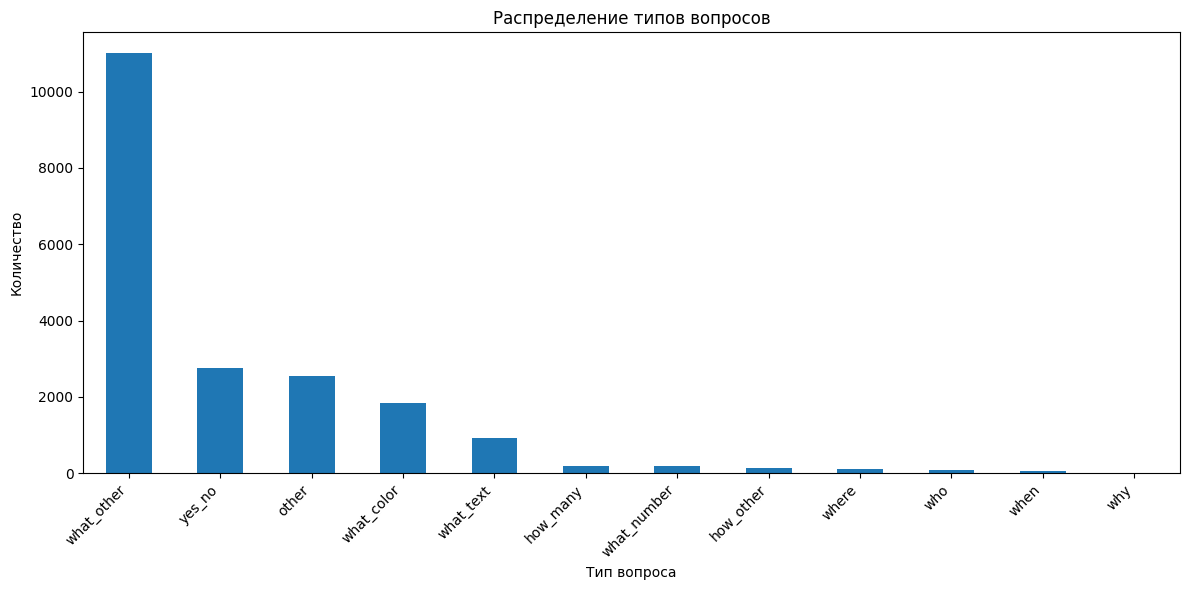


ШАГ 2: Корреляция типов вопросов с no_answer

Доля 'no_answer' по типам вопросов:
question_type
why            1.000000
when           0.694444
how_other      0.688889
who            0.621053
what_number    0.550562
where          0.536585
other          0.530363
what_text      0.502680
how_many       0.477833
what_other     0.335212
yes_no         0.330299
what_color     0.096687
Name: answer, dtype: float64


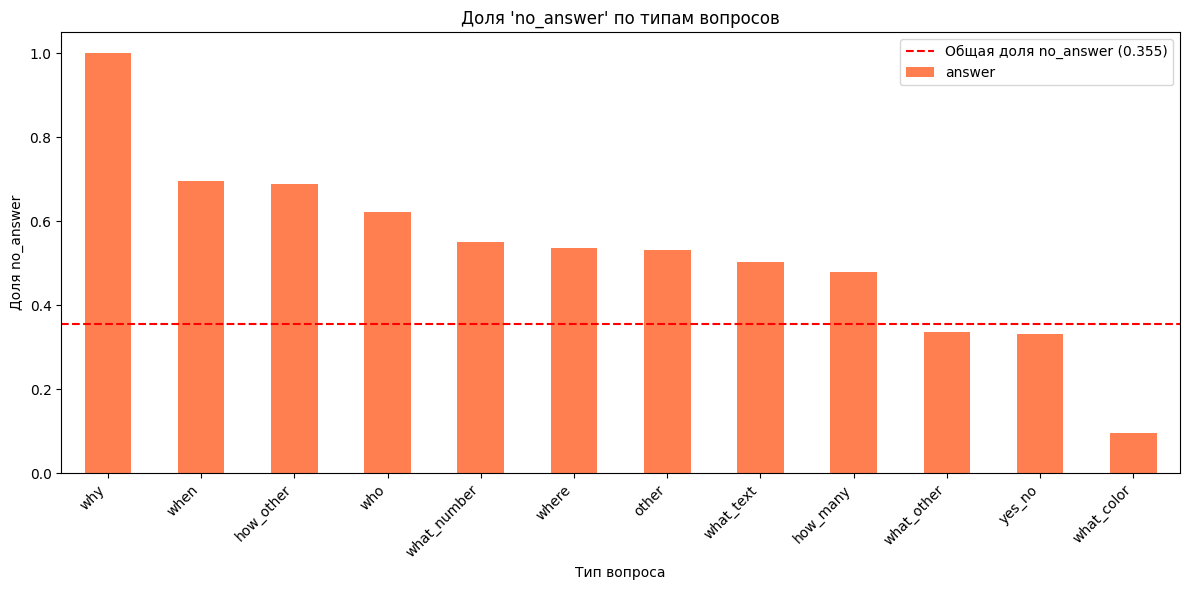


Абсолютные числа:
               total  no_answer  no_answer_pct
question_type                                 
why                9          9          100.0
when              72         50           69.4
how_other        135         93           68.9
who               95         59           62.1
what_number      178         98           55.1
where            123         66           53.7
other           2536       1345           53.0
what_text        933        469           50.3
how_many         203         97           47.8
what_other     11002       3688           33.5
yes_no          2746        907           33.0
what_color      1841        178            9.7

ШАГ 3: Категоризация ответов

Распределение категорий ответов:
answer_category
no_answer      7059
phrase         5195
single_word    4688
color          1570
yes_no          986
number          375
Name: count, dtype: int64

Доли:
answer_category
no_answer      35.52
phrase         26.14
single_word    23.59
color      

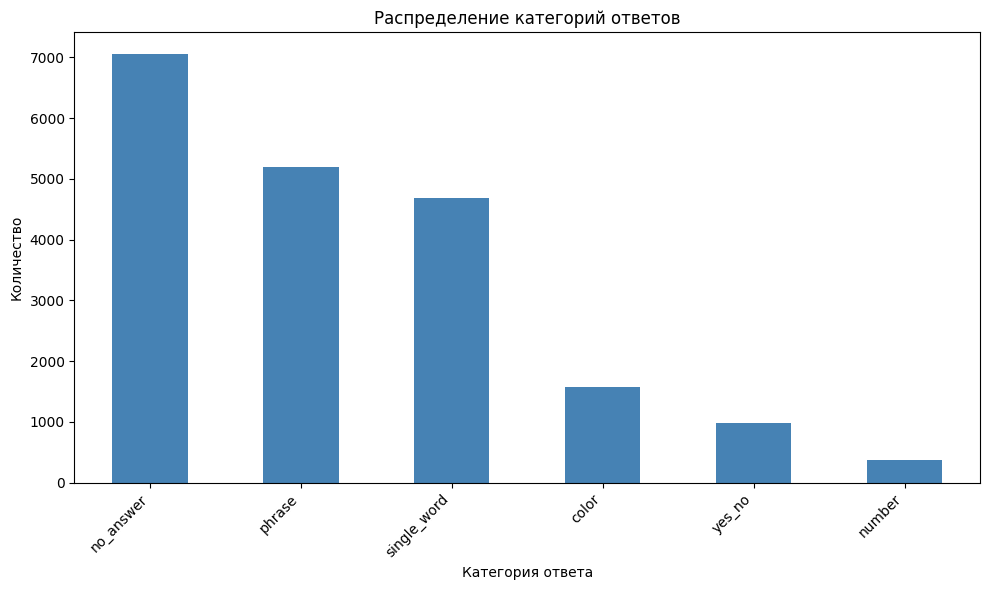


ШАГ 4: Взаимосвязь типов вопросов и категорий ответов

Доля категорий ответов по типам вопросов (%):
answer_category  color  no_answer  number  phrase  single_word  yes_no
question_type                                                         
how_many           0.0       47.8    33.5    13.8          4.9     0.0
how_other          0.7       68.9     0.7    14.1         13.3     2.2
other              4.3       53.0     2.6    19.6         14.0     6.5
what_color        72.2        9.7     0.0    14.9          3.2     0.0
what_number        0.0       55.1    30.3    11.2          3.4     0.0
what_other         0.4       33.5     1.1    31.5         33.5     0.0
what_text          0.0       50.3     3.0    31.9         14.8     0.0
when               0.0       69.4     0.0    30.6          0.0     0.0
where              0.0       53.7     0.0    26.8         19.5     0.0
who                0.0       62.1     0.0    16.8         21.1     0.0
why                0.0      100.0     0.0     

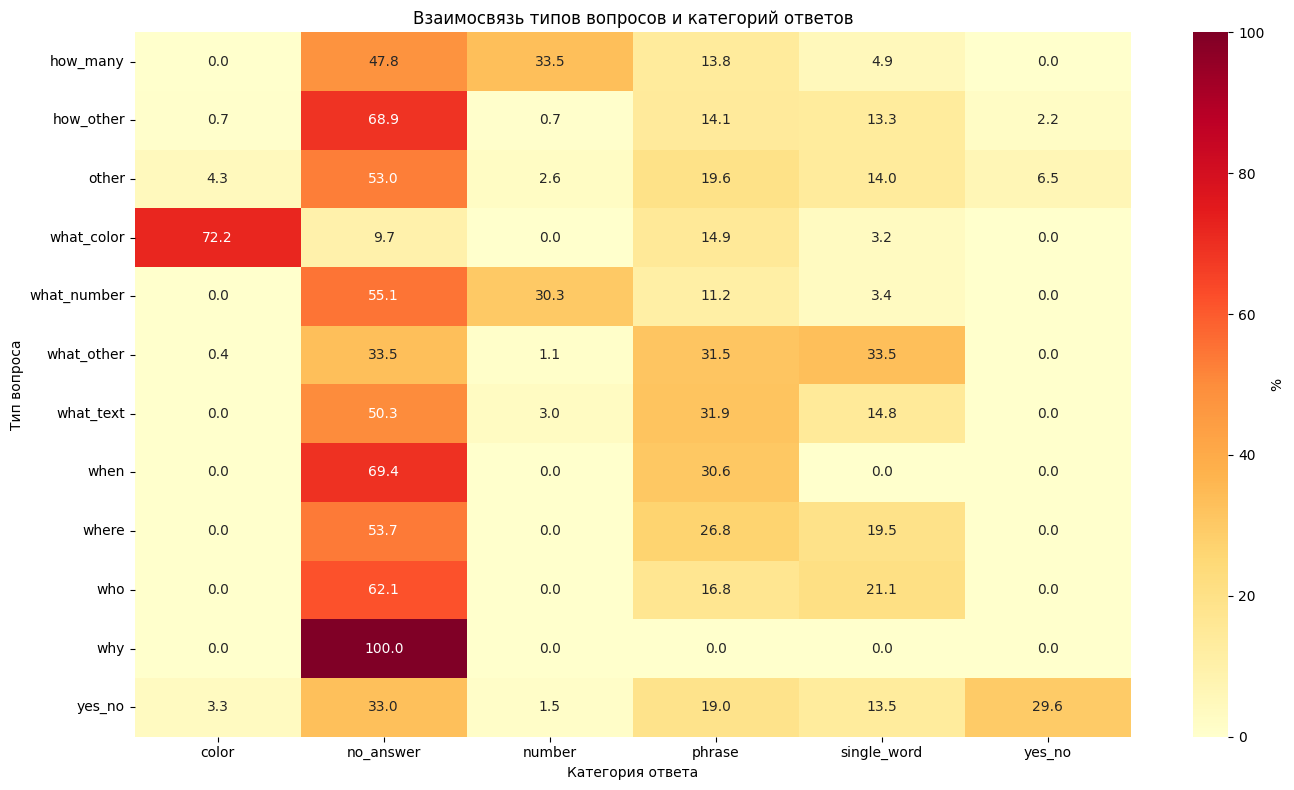


ШАГ 5: Примеры вопросов разных типов

--- YES_NO (2746 примеров) ---
  Q: Can you tell me what this bottle says? I need to know what medicine it is and how to use it. Thank you.
  A: no_answer (no_answer)

  Q: is this?
  A: no_answer (no_answer)


--- OTHER (2536 примеров) ---
  Q: Which CD is this?
  A: netgear (single_word)

  Q: Hi, what type of tea is this?
  A: twining (single_word)


--- WHAT_OTHER (11002 примеров) ---
  Q: What is that?
  A: floor (single_word)

  Q: What is this?
  A: broth (single_word)


--- WHAT_TEXT (933 примеров) ---
  Q: What did you say?
  A: no_answer (no_answer)

  Q: What is on the text?
  A: no_answer (no_answer)


--- WHO (95 примеров) ---
  Q: who's leg is this?
  A: no_answer (no_answer)

  Q: Who is answering my question?
  A: no_answer (no_answer)


--- WHAT_COLOR (1841 примеров) ---
  Q: What color is this? 
  A: brown (color)

  Q: What color is this?
  A: white (color)


--- WHEN (72 примеров) ---
  Q: When does this expire?
  A: no_answer 

In [21]:
# углублённый EDA по вопросам и изображениям
# your code here ┌(ಠ_ಠ)┘

# Анализ типов вопросов, корреляция с no_answer, категоризация ответов

# Загружаем данные, если ещё не загружены
if 'train2' not in globals():
    train2 = pd.read_csv(TRAIN_PATH)
    test = pd.read_csv(TEST_PATH)

print("=" * 80)
print("УГЛУБЛЁННЫЙ EDA: Анализ типов вопросов и ответов")
print("=" * 80)

# ============================================================================
# Шаг 1: Анализ типов вопросов
# ============================================================================
print("\n" + "=" * 80)
print("ШАГ 1: Анализ типов вопросов")
print("=" * 80)

def classify_question_type(question: str) -> str:
    """Классифицирует тип вопроса по начальным словам."""
    question_lower = question.lower().strip()
    
    # Wh-questions
    if question_lower.startswith('what'):
        if 'color' in question_lower or 'colour' in question_lower:
            return 'what_color'
        elif 'text' in question_lower or 'say' in question_lower or 'read' in question_lower:
            return 'what_text'
        elif 'number' in question_lower or 'count' in question_lower or 'many' in question_lower:
            return 'what_number'
        else:
            return 'what_other'
    elif question_lower.startswith('where'):
        return 'where'
    elif question_lower.startswith('when'):
        return 'when'
    elif question_lower.startswith('who'):
        return 'who'
    elif question_lower.startswith('why'):
        return 'why'
    elif question_lower.startswith('how'):
        if 'many' in question_lower or 'much' in question_lower:
            return 'how_many'
        else:
            return 'how_other'
    # Yes/No questions
    elif question_lower.startswith(('is ', 'are ', 'was ', 'were ', 'do ', 'does ', 'did ', 'can ', 'could ', 'will ', 'would ')):
        return 'yes_no'
    # Other
    else:
        return 'other'

# Применяем классификацию
train2['question_type'] = train2['question'].apply(classify_question_type)

# Статистика по типам вопросов
question_type_counts = train2['question_type'].value_counts()
print("\nРаспределение типов вопросов:")
print(question_type_counts)
print(f"\nВсего уникальных типов: {train2['question_type'].nunique()}")

# Визуализация
plt.figure(figsize=(12, 6))
question_type_counts.plot(kind='bar')
plt.title("Распределение типов вопросов")
plt.xlabel("Тип вопроса")
plt.ylabel("Количество")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ============================================================================
# Шаг 2: Корреляция типов вопросов с no_answer
# ============================================================================
print("\n" + "=" * 80)
print("ШАГ 2: Корреляция типов вопросов с no_answer")
print("=" * 80)

# Доля no_answer по типам вопросов
no_answer_by_type = train2.groupby('question_type')['answer'].apply(
    lambda x: (x == 'no_answer').sum() / len(x)
).sort_values(ascending=False)

print("\nДоля 'no_answer' по типам вопросов:")
print(no_answer_by_type)

# Визуализация
plt.figure(figsize=(12, 6))
no_answer_by_type.plot(kind='bar', color='coral')
plt.title("Доля 'no_answer' по типам вопросов")
plt.xlabel("Тип вопроса")
plt.ylabel("Доля no_answer")
plt.xticks(rotation=45, ha='right')
plt.axhline(y=train2['answer'].eq('no_answer').mean(), color='r', linestyle='--', 
            label=f"Общая доля no_answer ({train2['answer'].eq('no_answer').mean():.3f})")
plt.legend()
plt.tight_layout()
plt.show()

# Статистика: сколько вопросов каждого типа приводят к no_answer
print("\nАбсолютные числа:")
type_no_answer_counts = train2[train2['answer'] == 'no_answer'].groupby('question_type').size()
type_total_counts = train2.groupby('question_type').size()
print(pd.DataFrame({
    'total': type_total_counts,
    'no_answer': type_no_answer_counts,
    'no_answer_pct': (type_no_answer_counts / type_total_counts * 100).round(1)
}).sort_values('no_answer_pct', ascending=False))

# ============================================================================
# Шаг 3: Категоризация ответов
# ============================================================================
print("\n" + "=" * 80)
print("ШАГ 3: Категоризация ответов")
print("=" * 80)

def categorize_answer(answer: str) -> str:
    """Категоризирует ответ по типу."""
    if answer == 'no_answer':
        return 'no_answer'
    
    answer_lower = answer.lower().strip()
    
    # Цвета
    colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 
              'black', 'white', 'grey', 'gray', 'brown', 'tan', 'beige']
    if answer_lower in colors:
        return 'color'
    
    # Числа
    if answer_lower.isdigit() or (answer_lower.replace('.', '').isdigit()):
        return 'number'
    
    # Yes/No
    if answer_lower in ['yes', 'no']:
        return 'yes_no'
    
    # Однословные
    if len(answer.split()) == 1:
        return 'single_word'
    
    # Фразовые (2+ слова)
    if len(answer.split()) >= 2:
        return 'phrase'
    
    return 'other'

train2['answer_category'] = train2['answer'].apply(categorize_answer)

# Статистика по категориям ответов
answer_category_counts = train2['answer_category'].value_counts()
print("\nРаспределение категорий ответов:")
print(answer_category_counts)
print("\nДоли:")
print((answer_category_counts / len(train2) * 100).round(2))

# Визуализация
plt.figure(figsize=(10, 6))
answer_category_counts.plot(kind='bar', color='steelblue')
plt.title("Распределение категорий ответов")
plt.xlabel("Категория ответа")
plt.ylabel("Количество")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ============================================================================
# Шаг 4: Взаимосвязь типов вопросов и категорий ответов
# ============================================================================
print("\n" + "=" * 80)
print("ШАГ 4: Взаимосвязь типов вопросов и категорий ответов")
print("=" * 80)

# Кросс-таблица
crosstab = pd.crosstab(train2['question_type'], train2['answer_category'], normalize='index') * 100
print("\nДоля категорий ответов по типам вопросов (%):")
print(crosstab.round(1))

# Визуализация heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(crosstab, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label': '%'})
plt.title("Взаимосвязь типов вопросов и категорий ответов")
plt.xlabel("Категория ответа")
plt.ylabel("Тип вопроса")
plt.tight_layout()
plt.show()

# ============================================================================
# Шаг 5: Примеры для разных типов вопросов
# ============================================================================
print("\n" + "=" * 80)
print("ШАГ 5: Примеры вопросов разных типов")
print("=" * 80)

# Показываем по 2 примера каждого типа вопроса
for q_type in train2['question_type'].unique():
    examples = train2[train2['question_type'] == q_type].head(2)
    print(f"\n--- {q_type.upper()} ({len(train2[train2['question_type'] == q_type])} примеров) ---")
    for idx, row in examples.iterrows():
        print(f"  Q: {row['question']}")
        print(f"  A: {row['answer']} ({row['answer_category']})")
        print()

print("\n" + "=" * 80)
print("ИТОГИ УГЛУБЛЁННОГО EDA:")
print("=" * 80)
print(f"1. Наиболее частые типы вопросов: {question_type_counts.head(3).index.tolist()}")
print(f"2. Типы вопросов с наибольшей долей no_answer: {no_answer_by_type.head(3).index.tolist()}")
print(f"3. Наиболее частые категории ответов: {answer_category_counts.head(3).index.tolist()}")
print("=" * 80)

#### Длины ответов и вопросов

Ответы — длина в словах:
count    19873.000000
mean         1.421980
std          0.950657
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         17.000000
Name: answer, dtype: float64

Ответы — длина в символах:
count    19873.000000
mean         9.138932
std          5.889778
min          1.000000
25%          5.000000
50%          9.000000
75%          9.000000
max         92.000000
Name: answer, dtype: float64

Топ-10 самых длинных ответов (по словам):
- (17 слов) folder already exists to replace press l to use new folder press esc to quit press f3
- (15 слов) supersize your allowance this coupon entitles you to double your normal allowance for 1 week
- (13 слов) black tan stripes black tan circles same color material for tying around waist
- (13 слов) pursue not things that catch your eye but things that capture your heart
- (13 слов) dialogue box asking if you want to restore your computer using system restore
- (13 слов) i never make 

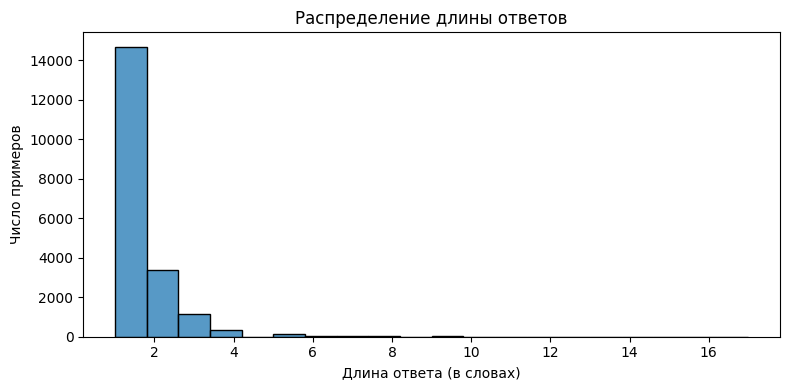


Вопросы — длина в словах:
count    19873.000000
mean         6.776279
std          5.442013
min          2.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         59.000000
Name: question, dtype: float64

Вопросы — длина в символах:
count    19873.000000
mean        32.930760
std         27.484874
min          6.000000
25%         18.000000
50%         25.000000
75%         37.000000
max        270.000000
Name: question, dtype: float64


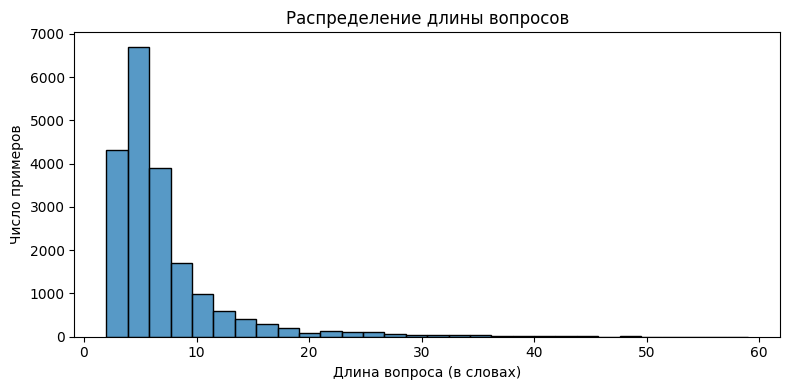

In [22]:
# длины ответов в словах и символах
answer_word_len = train2["answer"].str.split().apply(len)
answer_char_len = train2["answer"].str.len()

print("Ответы — длина в словах:")
print(answer_word_len.describe())
print("\nОтветы — длина в символах:")
print(answer_char_len.describe())

# посмотрим самые длинные ответы
print("\nТоп-10 самых длинных ответов (по словам):")
long_answers_idx = answer_word_len.sort_values(ascending=False).head(10).index
for idx in long_answers_idx:
    print(f"- ({answer_word_len[idx]} слов) {train2.loc[idx, 'answer']}")

plt.figure(figsize=(8, 4))
sns.histplot(answer_word_len, bins=20)
plt.xlabel("Длина ответа (в словах)")
plt.ylabel("Число примеров")
plt.title("Распределение длины ответов")
plt.tight_layout()
plt.show()

# длины вопросов в словах и символах
question_word_len = train2["question"].str.split().apply(len)
question_char_len = train2["question"].str.len()

print("\nВопросы — длина в словах:")
print(question_word_len.describe())
print("\nВопросы — длина в символах:")
print(question_char_len.describe())

plt.figure(figsize=(8, 4))
sns.histplot(question_word_len, bins=30)
plt.xlabel("Длина вопроса (в словах)")
plt.ylabel("Число примеров")
plt.title("Распределение длины вопросов")
plt.tight_layout()
plt.show()

Видно, что Вопросы - это относительно короткие предложения (в среднем 6-7 слов).


### 2. Улучшения моделей и признаков

Нужно реализовать минимум *два осмысленных улучшения* относительно вашего baseline.  
Это могут быть, например:

- Более сильные визуальные представления.
- Более сильные текстовые представления вопроса (возможно, совместное обучение текста и картинки).
- Fusion-улучшения: продуманные архитектуры для объединения признаков (кросс-аттеншн, адаптер к LLM и т.п.).
- Дополнительные фичи.

Важно: цель не просто "перебрать всё подряд", а:
- сформулировать гипотезы,
- реализовать хотя бы пару улучшений,
- сравнить их с baseline по той же схеме валидации.

#### Гипотезы и идеи

0. Cross-Attention fusion
1. Вопросы и ответы помечены "категориями" - сделаю из них эмбеддинги
3. CLIP/ViT для изображений + BERT для вопросов
4. то же + предсказание категорий, чтобы не переобучиться на них

##### Улучшение 0: Cross-Attention модуль для fusion

In [ ]:
# your code here ٩(⁎❛ᴗ❛⁎)۶
# # эксперименты с улучшенными архитектурами / признаками

class CrossAttentionFusion(nn.Module):
    """Cross-Attention fusion: 
            question features как Query, 
            image features как Key/Value.
    """
    def __init__(self, question_dim: int, image_dim: int, hidden_dim: int, num_heads: int = 8):
        super().__init__()
        self.num_heads = num_heads
        self.hidden_dim = hidden_dim
        
        # Проекционные слои для приведения к одной размерности
        self.q_proj = nn.Linear(question_dim, hidden_dim)
        self.k_proj = nn.Linear(image_dim, hidden_dim)
        self.v_proj = nn.Linear(image_dim, hidden_dim)
        
        # Multi-head attention
        self.attention = MultiheadAttention(
            embed_dim=hidden_dim,
            num_heads=num_heads,
            batch_first=True
        )
        
        # Output projection
        self.out_proj = nn.Linear(hidden_dim, hidden_dim)
        self.layer_norm = nn.LayerNorm(hidden_dim)
        self.dropout = nn.Dropout(0.1)
        
    def forward(self, question_features, image_features):
        """
        Args:
            question_features: [B, question_dim] - features вопроса
            image_features: [B, image_dim] - features изображения
        Returns:
            [B, hidden_dim] - обогащённые question features
        """
        B = question_features.shape[0]
        
        # Проекции
        Q = self.q_proj(question_features).unsqueeze(1)  # [B, 1, hidden_dim]
        K = self.k_proj(image_features).unsqueeze(1)     # [B, 1, hidden_dim]
        V = self.v_proj(image_features).unsqueeze(1)     # [B, 1, hidden_dim]
        
        # Multi-head attention
        attn_out, _ = self.attention(Q, K, V)  # [B, 1, hidden_dim]
        attn_out = attn_out.squeeze(1)  # [B, hidden_dim]
        
        # Residual + layer norm
        # Проецируем question_features до hidden_dim для residual
        q_residual = self.q_proj(question_features)  # [B, hidden_dim]
        out = self.layer_norm(attn_out + q_residual)
        out = self.dropout(out)
        out = self.out_proj(out)
        
        return out


##### Улучшение 2: Модель CLIP + BERT

In [ ]:
class VQAClipBERT(pl.LightningModule):
    def __init__(
        self,
        clip_model_name: str = "ViT-L/14",
        bert_model_name: str = "bert-base-uncased",
        num_answers: int = 5524,
        num_answer_categories: int = 10,
        num_question_types: int = 20,
        hidden_dim: int = 1024,
        learning_rate: float = 2e-5,
        freeze_image_encoder: bool = True,
        freeze_bert: bool = True,
        use_cross_attention: bool = False,
    ):
        super().__init__()
        self.save_hyperparameters()

        # модель CLIP для изображений
        self.clip_model, self.clip_preprocess = clip.load(clip_model_name)
        self.clip_visual = self.clip_model.visual

        # размерности для стандартных моделей CLIP
        clip_dimensions = {
            "ViT-B/32": 512,
            "ViT-B/16": 512,
            "ViT-L/14": 768,
            "RN50": 1024,
            "RN101": 512,
            "RN50x4": 640,
            "RN50x16": 768,
            "RN50x64": 1024,
        }

        if clip_model_name in clip_dimensions:
            image_feature_dim = clip_dimensions[clip_model_name]
        else:
            raise ValueError(f"Неизвестная модель изображений: {clip_model_name}")
        
        if freeze_image_encoder:
            for param in self.clip_visual.parameters():
                param.requires_grad = False
        
        # модель BERT для вопросов
        self.bert_tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
        self.bert_model = AutoModel.from_pretrained(bert_model_name)
        
        if freeze_bert:
            for param in self.bert_model.parameters():
                param.requires_grad = False
        
        # Размерность фичей вопроса из BERT
        question_feature_dim = self.bert_model.config.hidden_size  # 768 для distilbert/bert-base
        
        # Embedding для категорий ответов и типов вопросов
        self.answer_categories = nn.Embedding(num_answer_categories, question_feature_dim)
        self.question_types = nn.Embedding(num_question_types, question_feature_dim)
        
        # Словари для маппинга строк в индексы
        self.answer_category2id = None  # будет установлен при инициализации
        self.question_type2id = None    # будет установлен при инициализации

        # Fusion модуль
        self.use_cross_attention = use_cross_attention
        if use_cross_attention:
            self.fusion = CrossAttentionFusion(
                question_dim=question_feature_dim,  # 768
                image_dim=image_feature_dim,        # 768
                hidden_dim=hidden_dim,              # 1024
                num_heads=8
            )
            fusion_output_dim = hidden_dim  # 1024 for cross_attention
        else:
            # Простая конкатенация
            fusion_input_dim = image_feature_dim + question_feature_dim # 512 + 768 = 1280
            self.fusion = nn.Sequential(
                nn.Linear(fusion_input_dim, hidden_dim), # 1280 -> 512
                nn.ReLU(),
                nn.Dropout(0.5),
                nn.Linear(hidden_dim, hidden_dim // 2),
                nn.ReLU(),
                nn.Dropout(0.3),
            )
            fusion_output_dim = hidden_dim // 2  # 256
        
        # Финальный классификатор
        self.classifier = nn.Sequential(
            nn.Linear(fusion_output_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim // 2, num_answers),
        )
        
        # Метрики
        self.train_acc = Accuracy(task="multiclass", num_classes=num_answers)
        self.val_acc = Accuracy(task="multiclass", num_classes=num_answers)
        
        self.learning_rate = learning_rate

    def forward(self, images, questions, answer_categories, question_types):
        """
        Args:
            images: torch.Tensor [B, 3, 224, 224] - уже предобработанные изображения
            questions: List[str] или Tuple[str] - список строк вопросов
        Returns:
            logits: torch.Tensor [B, num_answers]
        """
        # Визуальные признаки через CLIP
        # Важно: приводим dtype входа к dtype CLIP, иначе при bf16-mixed легко ловить NaN/нестабильность
        images = images.to(dtype=self.clip_model.dtype)
        img_features = self.clip_visual(images)  # [B, image_feature_dim]
        img_features = img_features.float()
        
        # Текстовые признаки через BERT
        # Токенизация вопросов
        if isinstance(questions, tuple):
            questions_list = list(questions)
        elif isinstance(questions, list):
            questions_list = questions
        elif isinstance(questions, str):
            questions_list = [questions]
        else:
            raise ValueError(f"Неожиданный формат вопросов: {type(questions)}. Ожидаем tuple, list или str.")
        
        # Токенизация с padding и truncation
        encoded = self.bert_tokenizer(
            questions_list,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=77,  # как в CLIP
        ).to(images.device)

        # Получаем фичи из BERT
        with torch.set_grad_enabled(not self.hparams.freeze_bert):
            bert_output = self.bert_model(**encoded)
            # Используем [CLS] токен (первый токен) для представления вопроса
            q_features = bert_output.last_hidden_state[:, 0, :]  # [B, question_feature_dim]
        
        ac_list = []
        if isinstance(answer_categories, tuple):
            ac_list = list(answer_categories)
        elif isinstance(answer_categories, list):
            ac_list = answer_categories
        elif isinstance(answer_categories, str):
            ac_list = [answer_categories]
        else:
            raise ValueError(f"Неожиданный формат вопросов: {type(answer_categories)}. Ожидаем tuple, list или str.")

        if len(ac_list) > 0 and ac_list[0] != "":
        # Преобразуем строки в индексы для эмбеддингов
            if self.answer_category2id is not None:
                ac_indices = [self.answer_category2id.get(ac, 0) for ac in ac_list]
            else:
                # Fallback: используем хеш для маппинга (не идеально, но работает)
                ac_indices = [hash(ac) % self.hparams.num_answer_categories for ac in ac_list]
            ac_indices_tensor = torch.tensor(ac_indices, dtype=torch.long, device=images.device)
            ac_features = self.answer_categories(ac_indices_tensor)  # [B, question_feature_dim]
        else:
            ac_features = torch.zeros(q_features.shape[0], self.bert_model.config.hidden_size, device=images.device)
        
        qt_list = []
        if isinstance(question_types, tuple):
            qt_list = list(question_types)
        elif isinstance(question_types, list):
            qt_list = question_types
        elif isinstance(question_types, str):
            qt_list = [question_types]
        else:
            raise ValueError(f"Неожиданный формат вопросов: {type(question_types)}. Ожидаем tuple, list или str.")

        if len(qt_list) > 0 and qt_list[0] != "":
            # Преобразуем строки в индексы для эмбеддингов
            if self.question_type2id is not None:
                qt_indices = [self.question_type2id.get(qt, 0) for qt in qt_list]
            else:
                # Fallback: используем хеш для маппинга
                qt_indices = [hash(qt) % self.hparams.num_question_types for qt in qt_list]
            qt_indices_tensor = torch.tensor(qt_indices, dtype=torch.long, device=images.device)
            qt_features = self.question_types(qt_indices_tensor)  # [B, question_feature_dim]
        else:
            qt_features = torch.zeros(q_features.shape[0], self.bert_model.config.hidden_size, device=images.device)

        txt_features = q_features + ac_features + qt_features

        # Fusion
        if self.use_cross_attention:
            fused_features = self.fusion(txt_features, img_features)  # [B, hidden_dim]
        else:
            combined = torch.cat([img_features, txt_features], dim=1)  # [B, image_dim + question_dim]
            fused_features = self.fusion(combined)  # [B, hidden_dim // 2]
        
        # Классификация
        logits = self.classifier(fused_features)  # [B, num_answers]
        
        return logits

    def training_step(self, batch, batch_idx):
        images, questions, answers, answer_categories, question_types = batch
        logits = self(images, questions, answer_categories, question_types)
        loss = F.cross_entropy(logits, answers)
   
        batch_size = answers.shape[0]
        self.train_acc(logits, answers)
        self.log("train_loss", loss, on_step=True, on_epoch=True, prog_bar=True, batch_size=batch_size)
        self.log("train_acc", self.train_acc, on_step=True, on_epoch=True, prog_bar=True, batch_size=batch_size)
        
        return loss

    def validation_step(self, batch, batch_idx):
        images, questions, answers, answer_categories, question_types = batch
        logits = self(images, questions, answer_categories, question_types)
        loss = F.cross_entropy(logits, answers)
        
        batch_size = answers.shape[0]
        self.val_acc(logits, answers)
        self.log("val_loss", loss, on_step=False, on_epoch=True, prog_bar=True, batch_size=batch_size)
        self.log("val_acc", self.val_acc, on_step=False, on_epoch=True, prog_bar=True, batch_size=batch_size)
        
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.AdamW(self.parameters(), lr=self.learning_rate, weight_decay=1e-3)
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
            optimizer, mode="min", factor=0.5, patience=4
        )

        return {
            "optimizer": optimizer,
            "lr_scheduler": {
                "scheduler": scheduler,
                "monitor": "val_loss",
            },
        }

#### Эксперимент 1

In [ ]:
MAX_WORD_COUNT = 10
answer2id, id2answer, train_processed2 = build_answer_vocab(train2, min_freq=2, max_word_count=MAX_WORD_COUNT)

# Создаём словари для маппинга категорий ответов и типов вопросов в индексы
answer_categories_unique = sorted(train_processed2["answer_category"].unique())
question_types_unique = sorted(train_processed2["question_type"].unique())
answer_category2id = {cat: idx for idx, cat in enumerate(answer_categories_unique)}
question_type2id = {qt: idx for idx, qt in enumerate(question_types_unique)}

# Проверка
print(f"Количество уникальных категорий ответов: {len(answer_category2id)}")
print(f"Категории: {list(answer_category2id.keys())}")
print(f"\nКоличество уникальных типов вопросов: {len(question_type2id)}")
print(f"Типы: {list(question_type2id.keys())}")

Исходный размер словаря: 5524
Топ-10 самых частых ответов:
  no_answer: 7059
  no: 512
  yes: 474
  white: 279
  grey: 269
  blue: 219
  black: 215
  red: 120
  brown: 103
  pink: 94
Редких ответов (freq < 2): 4250
Фильтрация ответов по количеству слов: 10 слов
Финальный размер словаря ответов: 1274
Частота 'no_answer': 11309
Доля 'no_answer': 0.569
Количество уникальных категорий ответов: 6
Категории: ['color', 'no_answer', 'number', 'phrase', 'single_word', 'yes_no']

Количество уникальных типов вопросов: 12
Типы: ['how_many', 'how_other', 'other', 'what_color', 'what_number', 'what_other', 'what_text', 'when', 'where', 'who', 'why', 'yes_no']


In [57]:
# DataModule для CLIP+BERT модели
dm_clip_bert = VQADataModule(
    train_df=train_processed2,
    test_df=test,
    images_dir=IMAGES_DIR,
    word2id=None,  # можно передать None, но лучше оставить для совместимости
    answer2id=answer2id,
    batch_size=128,
    num_workers=20,  # всего 29 vCPU
    val_size=0.1,
    random_state=40,
    use_bert=True,  # ВАЖНО: включаем режим BERT
    augment_train=False,
    image_normalization="clip",
)

# Модель CLIP + BERT (простая конкатенация)
model_clip_bert = VQAClipBERT(
    clip_model_name="ViT-B/16",
    bert_model_name="distilbert-base-uncased",  # быстрее, чем bert-base-uncased
    num_answers=len(answer2id),
    num_answer_categories=len(answer_category2id),
    num_question_types=len(question_type2id),
    hidden_dim=1024,
    learning_rate=1e-4,  # BERT обычно требует меньший LR
    freeze_image_encoder=True,  # заморозим CLIP для начала
    freeze_bert=True,  # разморозим BERT для fine-tuning
    use_cross_attention=False,  # сначала попробуем простую конкатенацию
)

# Устанавливаем словари
model_clip_bert.answer_category2id = answer_category2id
model_clip_bert.question_type2id = question_type2id

# Callbacks
checkpoint_callback_clip_bert = ModelCheckpoint(
    monitor="val_acc",
    mode="max",
    save_top_k=1,
    filename="vqa-clip-bert-{epoch:02d}-{val_acc:.3f}",
    save_last=True,
)

early_stop_callback_clip_bert = EarlyStopping(
    monitor="val_acc",
    mode="max",
    patience=15,
    verbose=True,
)

# Logger
logger_clip_bert = TensorBoardLogger("logs", name="vqa_clip_bert")
# logger_clip_bert = CSVLogger("logs", name="vqa_clip_bert")


# Trainer для CLIP+BERT
trainer_clip_bert = pl.Trainer(
    max_epochs=100,  # можно увеличить, но обычно само раньше останавливается
    accelerator="auto",
    devices="auto",
    callbacks=[checkpoint_callback_clip_bert, early_stop_callback_clip_bert],
    logger=logger_clip_bert,
    log_every_n_steps=20,
    val_check_interval=1.0,
    precision="bf16-mixed",  # или "16-mixed" если bf16 не поддерживается
    accumulate_grad_batches=1,
    gradient_clip_val=1.0,
)


Using bfloat16 Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
`Trainer(val_check_interval=1.0)` was configured so validation will run at the end of the training epoch..


In [58]:
# Запускаем обучение
dm_clip_bert.setup("fit")
trainer_clip_bert.fit(model_clip_bert, dm_clip_bert)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


/home/yc-user/hse-fcs-multimodal-course/.venv/lib/python3.10/site-packages/pytorch_lightning/utilities/model_summary/model_summary.py:242: Precision bf16-mixed is not supported by the model summary.  Estimated model size in MB will not be accurate. Using 32 bits instead.


┏━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name              ┃ Type               ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ clip_model        │ CLIP               │  149 M │ eval  │     0 │
│ 1 │ clip_visual       │ VisionTransformer  │ 86.2 M │ eval  │     0 │
│ 2 │ bert_model        │ DistilBertModel    │ 66.4 M │ eval  │     0 │
│ 3 │ answer_categories │ Embedding          │  4.6 K │ train │     0 │
│ 4 │ question_types    │ Embedding          │  9.2 K │ train │     0 │
│ 5 │ fusion            │ Sequential         │  1.8 M │ train │     0 │
│ 6 │ classifier        │ Sequential         │  916 K │ train │     0 │
│ 7 │ train_acc         │ MulticlassAccuracy │      0 │ train │     0 │
│ 8 │ val_acc           │ MulticlassAccuracy │      0 │ train │     0 │
└───┴───────────────────┴────────────────────┴────────┴───────┴───────┘

Trainable params: 66.2 M                                                                                           
Non-trainable params: 152 M                                                                                        
Total params: 218 M                                                                                                
Total estimated model params size (MB): 875                                                                        
Modules in train mode: 16                                                                                          
Modules in eval mode: 319                                                                                          
Total FLOPs: 0

Output()

/home/yc-user/hse-fcs-multimodal-course/.venv/lib/python3.10/site-packages/pytorch_lightning/loops/fit_loop.py:534:
Found 319 module(s) in eval mode at the start of training. This may lead to unexpected behavior during training. If
this is intentional, you can ignore this warning.

Metric val_acc improved. New best score: 0.611


Metric val_acc improved by 0.001 >= min_delta = 0.0. New best score: 0.612


Metric val_acc improved by 0.001 >= min_delta = 0.0. New best score: 0.613


Metric val_acc improved by 0.001 >= min_delta = 0.0. New best score: 0.614


Metric val_acc improved by 0.001 >= min_delta = 0.0. New best score: 0.615


Metric val_acc improved by 0.005 >= min_delta = 0.0. New best score: 0.620


Metric val_acc improved by 0.006 >= min_delta = 0.0. New best score: 0.626


Metric val_acc improved by 0.006 >= min_delta = 0.0. New best score: 0.631


Metric val_acc improved by 0.001 >= min_delta = 0.0. New best score: 0.632


Metric val_acc improved by 0.004 >= min_delta = 0.0. New best score: 0.636


Metric val_acc improved by 0.008 >= min_delta = 0.0. New best score: 0.644


Metric val_acc improved by 0.002 >= min_delta = 0.0. New best score: 0.645


Metric val_acc improved by 0.003 >= min_delta = 0.0. New best score: 0.648


Metric val_acc improved by 0.003 >= min_delta = 0.0. New best score: 0.650


Metric val_acc improved by 0.002 >= min_delta = 0.0. New best score: 0.652


Metric val_acc improved by 0.004 >= min_delta = 0.0. New best score: 0.655


Metric val_acc improved by 0.003 >= min_delta = 0.0. New best score: 0.658


Metric val_acc improved by 0.005 >= min_delta = 0.0. New best score: 0.662


Metric val_acc improved by 0.002 >= min_delta = 0.0. New best score: 0.664


Metric val_acc improved by 0.001 >= min_delta = 0.0. New best score: 0.665


Metric val_acc improved by 0.002 >= min_delta = 0.0. New best score: 0.667


Metric val_acc improved by 0.001 >= min_delta = 0.0. New best score: 0.668


Metric val_acc improved by 0.002 >= min_delta = 0.0. New best score: 0.670


Metric val_acc improved by 0.001 >= min_delta = 0.0. New best score: 0.671


Metric val_acc improved by 0.003 >= min_delta = 0.0. New best score: 0.674


Metric val_acc improved by 0.004 >= min_delta = 0.0. New best score: 0.678


Metric val_acc improved by 0.009 >= min_delta = 0.0. New best score: 0.686


Metric val_acc improved by 0.002 >= min_delta = 0.0. New best score: 0.688


Metric val_acc improved by 0.001 >= min_delta = 0.0. New best score: 0.688


Metric val_acc improved by 0.003 >= min_delta = 0.0. New best score: 0.691


Metric val_acc improved by 0.001 >= min_delta = 0.0. New best score: 0.692


Monitored metric val_acc did not improve in the last 15 records. Best score: 0.692. Signaling Trainer to stop.


In [60]:
# Загружаем лучшую модель (или используем уже обученную)
best_model_path = checkpoint_callback_clip_bert.best_model_path
last_model_path = checkpoint_callback_clip_bert.last_model_path
submission_path = DATA_DIR / "submission_clip_bert.csv"

# get_submission(VQAClipBERT, last_model_path, submission_path, dm_clip_bert, id2answer)
get_submission(VQAClipBERT, best_model_path, submission_path, dm_clip_bert, id2answer)

Загружаем чекпоинт: logs/vqa_clip_bert/version_23/checkpoints/vqa-clip-bert-epoch=74-val_acc=0.692.ckpt
Размер submission: 4969
Колонки: ['ID', 'answer']

Первые несколько строк:
                 ID     answer
0  001506824e76191d      phone
1  002677a6d6bac1dd  no_answer
2  0027a003a50877a5     laptop
3  002bf579cd0bfaed        yes
4  0035fa712c369df8      pasta
5  0042dd305b63ce2d      money
6  0043d79066103187      table
7  004741a80abd988c   keyboard
8  004c59b16f26a4f7  no_answer
9  005aa83ea31a8235     yellow

Submission сохранён в data/course_vqa_dataset/submission_clip_bert.csv
Проверка формата:
  Размер sample_submission: 4969
  Размер нашего submission: 4969
  Совпадают ID: True


##### Результат

Текста написала много, но переобучилась на эмбеддинги и большинство текстов неверныые.

На Kaggle `accuracy=0.1799`

#### Эксперимент 2

Предсказание категорий вопроса и ответа

In [ ]:
class VQAClipBERTpred(VQAClipBERT):
    """
    Расширенная версия VQAClipBERT с предсказанием категорий ответов и типов вопросов.
    На тесте автоматически предсказывает эти признаки вместо использования переданных.
    """
    
    def __init__(
        self,
        clip_model_name: str = "ViT-L/14",
        bert_model_name: str = "bert-base-uncased",
        num_answers: int = 5524,
        num_answer_categories: int = 10,
        num_question_types: int = 20,
        hidden_dim: int = 1024,
        learning_rate: float = 2e-5,
        freeze_image_encoder: bool = True,
        freeze_bert: bool = True,
        use_cross_attention: bool = False,
        category_loss_weight: float = 0.4,  # больше внимания категориям (они важнее и хуже предсказываются)
        type_loss_weight: float = 0.15     # меньше внимания типам (они уже хорошо предсказываются)
    ):
        # Вызываем __init__ родительского класса
        super().__init__(
            clip_model_name=clip_model_name,
            bert_model_name=bert_model_name,
            num_answers=num_answers,
            num_answer_categories=num_answer_categories,
            num_question_types=num_question_types,
            hidden_dim=hidden_dim,
            learning_rate=learning_rate,
            freeze_image_encoder=freeze_image_encoder,
            freeze_bert=freeze_bert,
            use_cross_attention=use_cross_attention,
        )
        
        # Веса для дополнительных loss
        self.category_loss_weight = category_loss_weight
        self.type_loss_weight = type_loss_weight
        
        # Определяем размерность для fusion output (зависит от use_cross_attention)
        if use_cross_attention:
            fusion_output_dim = hidden_dim  # 1024
        else:
            fusion_output_dim = hidden_dim // 2  # 512
        
        # Классификатор для категорий ответов
        self.category_predictor = nn.Sequential(
            nn.Linear(fusion_output_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim // 2, num_answer_categories),
        )
        
        # Классификатор для типов вопросов
        self.type_predictor = nn.Sequential(
            nn.Linear(fusion_output_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim // 2, num_question_types),
        )
    
    def forward(self, images, questions, answer_categories, question_types, predict_auxiliary=False):
        """
        Args:
            images: torch.Tensor [B, 3, 224, 224] - уже предобработанные изображения
            questions: List[str] или Tuple[str] - список строк вопросов
            answer_categories: список строк или пустой список
            question_types: список строк или пустой список
            predict_auxiliary: bool - если True, предсказываем категории/типы вместо использования переданных
        Returns:
            logits: torch.Tensor [B, num_answers]
            category_logits: torch.Tensor [B, num_answer_categories] (если predict_auxiliary=True)
            type_logits: torch.Tensor [B, num_question_types] (если predict_auxiliary=True)
        """
        # Визуальные признаки через CLIP
        images = images.to(dtype=self.clip_model.dtype)
        img_features = self.clip_visual(images)  # [B, image_feature_dim]
        img_features = img_features.float()
        
        # Текстовые признаки через BERT
        if isinstance(questions, tuple):
            questions_list = list(questions)
        elif isinstance(questions, list):
            questions_list = questions
        elif isinstance(questions, str):
            questions_list = [questions]
        else:
            raise ValueError(f"Неожиданный формат вопросов: {type(questions)}. Ожидаем tuple, list или str.")
        
        # Токенизация с padding и truncation
        encoded = self.bert_tokenizer(
            questions_list,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=77,
        ).to(images.device)

        # Получаем фичи из BERT
        with torch.set_grad_enabled(not self.hparams.freeze_bert):
            bert_output = self.bert_model(**encoded)
            q_features = bert_output.last_hidden_state[:, 0, :]  # [B, question_feature_dim]
        
        # Определяем, нужно ли предсказывать категории и типы
        need_predict = predict_auxiliary or (
            (isinstance(answer_categories, (list, tuple)) and 
             (len(answer_categories) == 0 or answer_categories[0] == "")) or
            (isinstance(answer_categories, str) and answer_categories == "")
        )
        
        # Первый проход: получаем начальные fused_features без эмбеддингов категорий/типов
        if need_predict:
            # Используем только BERT features для первого прохода
            txt_features_initial = q_features
        else:
            # Используем переданные категории и типы
            # Обработка категорий ответов
            ac_list = []
            if isinstance(answer_categories, tuple):
                ac_list = list(answer_categories)
            elif isinstance(answer_categories, list):
                ac_list = answer_categories
            elif isinstance(answer_categories, str):
                ac_list = [answer_categories]
            else:
                raise ValueError(f"Неожиданный формат категорий ответов: {type(answer_categories)}.")
            
            if len(ac_list) > 0 and ac_list[0] != "":
                if self.answer_category2id is not None:
                    ac_indices = [self.answer_category2id.get(ac, 0) for ac in ac_list]
                else:
                    ac_indices = [hash(ac) % self.hparams.num_answer_categories for ac in ac_list]
                ac_indices_tensor = torch.tensor(ac_indices, dtype=torch.long, device=images.device)
                ac_features = self.answer_categories(ac_indices_tensor)
            else:
                ac_features = torch.zeros(q_features.shape[0], self.bert_model.config.hidden_size, device=images.device)
            
            # Обработка типов вопросов
            qt_list = []
            if isinstance(question_types, tuple):
                qt_list = list(question_types)
            elif isinstance(question_types, list):
                qt_list = question_types
            elif isinstance(question_types, str):
                qt_list = [question_types]
            else:
                raise ValueError(f"Неожиданный формат типов вопросов: {type(question_types)}.")
            
            if len(qt_list) > 0 and qt_list[0] != "":
                if self.question_type2id is not None:
                    qt_indices = [self.question_type2id.get(qt, 0) for qt in qt_list]
                else:
                    qt_indices = [hash(qt) % self.hparams.num_question_types for qt in qt_list]
                qt_indices_tensor = torch.tensor(qt_indices, dtype=torch.long, device=images.device)
                qt_features = self.question_types(qt_indices_tensor)
            else:
                qt_features = torch.zeros(q_features.shape[0], self.bert_model.config.hidden_size, device=images.device)
            
            txt_features_initial = q_features + ac_features + qt_features
        
        # Первый fusion для предсказания категорий/типов
        if self.use_cross_attention:
            fused_features_initial = self.fusion(txt_features_initial, img_features)
        else:
            combined_initial = torch.cat([img_features, txt_features_initial], dim=1)
            fused_features_initial = self.fusion(combined_initial)
        
        # Предсказываем категории и типы, если нужно
        if need_predict:
            category_logits = self.category_predictor(fused_features_initial)  # [B, num_answer_categories]
            type_logits = self.type_predictor(fused_features_initial)  # [B, num_question_types]
            
            # Берем argmax для получения индексов
            predicted_category_indices = category_logits.argmax(dim=1)  # [B]
            predicted_type_indices = type_logits.argmax(dim=1)  # [B]
            
            # Используем предсказанные индексы для эмбеддингов
            ac_features_pred = self.answer_categories(predicted_category_indices)  # [B, question_feature_dim]
            qt_features_pred = self.question_types(predicted_type_indices)  # [B, question_feature_dim]
            
            # Обновляем txt_features с предсказанными эмбеддингами
            txt_features_final = q_features + ac_features_pred + qt_features_pred
            
            # Пересчитываем fused_features с обновленными txt_features
            if self.use_cross_attention:
                fused_features_final = self.fusion(txt_features_final, img_features)
            else:
                combined_final = torch.cat([img_features, txt_features_final], dim=1)
                fused_features_final = self.fusion(combined_final)
        else:
            # Используем начальные fused_features (уже с переданными эмбеддингами)
            fused_features_final = fused_features_initial
            category_logits = None
            type_logits = None
        
        # Финальная классификация ответов
        logits = self.classifier(fused_features_final)  # [B, num_answers]
        
        if predict_auxiliary or need_predict:
            return logits, category_logits, type_logits
        else:
            return logits
    
    def training_step(self, batch, batch_idx):
        images, questions, answers, answer_categories, question_types = batch
        
        # Получаем индексы категорий и типов для обучения классификаторов
        if self.answer_category2id is not None:
            ac_indices = torch.tensor([
                self.answer_category2id.get(ac, 0) for ac in answer_categories
            ], dtype=torch.long, device=images.device)
        else:
            ac_indices = torch.zeros(len(answer_categories), dtype=torch.long, device=images.device)
        
        if self.question_type2id is not None:
            qt_indices = torch.tensor([
                self.question_type2id.get(qt, 0) for qt in question_types
            ], dtype=torch.long, device=images.device)
        else:
            qt_indices = torch.zeros(len(question_types), dtype=torch.long, device=images.device)
        
        # Вызываем forward с predict_auxiliary=True для получения всех логits
        logits, category_logits, type_logits = self(
            images, questions, answer_categories, question_types,
            predict_auxiliary=True
        )
        
        # Основная loss для ответов
        loss_answer = F.cross_entropy(logits, answers)
        
        # Дополнительные loss для категорий и типов
        loss_category = F.cross_entropy(category_logits, ac_indices)
        loss_type = F.cross_entropy(type_logits, qt_indices)
        
        # Общая loss с весами
        total_loss = loss_answer + self.category_loss_weight * loss_category + self.type_loss_weight * loss_type
        
        batch_size = answers.shape[0]
        self.train_acc(logits, answers)
        self.log("train_loss", total_loss, on_step=True, on_epoch=True, prog_bar=True, batch_size=batch_size)
        self.log("train_loss_answer", loss_answer, on_step=True, on_epoch=True, batch_size=batch_size)
        self.log("train_loss_category", loss_category, on_step=True, on_epoch=True, batch_size=batch_size)
        self.log("train_loss_type", loss_type, on_step=True, on_epoch=True, batch_size=batch_size)
        self.log("train_acc", self.train_acc, on_step=True, on_epoch=True, prog_bar=True, batch_size=batch_size)
        
        return total_loss
    
    def validation_step(self, batch, batch_idx):
        images, questions, answers, answer_categories, question_types = batch
        
        # На валидации тоже предсказываем (чтобы проверить качество)
        logits, category_logits, type_logits = self(
            images, questions, answer_categories, question_types,
            predict_auxiliary=True
        )
        
        loss = F.cross_entropy(logits, answers)
        
        # Опционально: можно добавить метрики для категорий и типов
        if self.answer_category2id is not None:
            ac_indices = torch.tensor([
                self.answer_category2id.get(ac, 0) for ac in answer_categories
            ], dtype=torch.long, device=images.device)
            category_acc = (category_logits.argmax(dim=1) == ac_indices).float().mean()
            self.log("val_category_acc", category_acc, on_step=False, on_epoch=True, batch_size=answers.shape[0])
        
        if self.question_type2id is not None:
            qt_indices = torch.tensor([
                self.question_type2id.get(qt, 0) for qt in question_types
            ], dtype=torch.long, device=images.device)
            type_acc = (type_logits.argmax(dim=1) == qt_indices).float().mean()
            self.log("val_type_acc", type_acc, on_step=False, on_epoch=True, batch_size=answers.shape[0])
        
        batch_size = answers.shape[0]
        self.val_acc(logits, answers)
        self.log("val_loss", loss, on_step=False, on_epoch=True, prog_bar=True, batch_size=batch_size)
        self.log("val_acc", self.val_acc, on_step=False, on_epoch=True, prog_bar=True, batch_size=batch_size)
        
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.AdamW(self.parameters(), lr=self.learning_rate, weight_decay=1e-3)
        
        # периодически перезапускает LR
        scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
            optimizer,
            T_0=8,  # период первого перезапуска (в эпохах)
            T_mult=2,  # множитель для следующего периода (10, 15, 40, ...)
            eta_min=1e-6,  # минимальный LR
        )
        
        return {
            "optimizer": optimizer,
            "lr_scheduler": {
                "scheduler": scheduler,
                "interval": "epoch",
                "frequency": 1,
            },
        }

In [105]:
MAX_WORD_COUNT = 10
answer2id, id2answer, train_processed2 = build_answer_vocab(train2, min_freq=2, max_word_count=MAX_WORD_COUNT)

# Создаём словари для маппинга категорий ответов и типов вопросов в индексы
answer_categories_unique = sorted(train_processed2["answer_category"].unique())
question_types_unique = sorted(train_processed2["question_type"].unique())
answer_category2id = {cat: idx for idx, cat in enumerate(answer_categories_unique)}
question_type2id = {qt: idx for idx, qt in enumerate(question_types_unique)}

# Проверка
print(f"\nКоличество уникальных категорий ответов: {len(answer_category2id)}")
print(f"Категории: {list(answer_category2id.keys())}")
print(f"\nКоличество уникальных типов вопросов: {len(question_type2id)}")
print(f"Типы: {list(question_type2id.keys())}")

Исходный размер словаря: 5524
Топ-10 самых частых ответов:
  no_answer: 7059
  no: 512
  yes: 474
  white: 279
  grey: 269
  blue: 219
  black: 215
  red: 120
  brown: 103
  pink: 94
Редких ответов (freq < 2): 4250
Фильтрация ответов по количеству слов: 10 слов
Финальный размер словаря ответов: 1274
Частота 'no_answer': 11309
Доля 'no_answer': 0.569

Количество уникальных категорий ответов: 6
Категории: ['color', 'no_answer', 'number', 'phrase', 'single_word', 'yes_no']

Количество уникальных типов вопросов: 12
Типы: ['how_many', 'how_other', 'other', 'what_color', 'what_number', 'what_other', 'what_text', 'when', 'where', 'who', 'why', 'yes_no']


In [109]:
# Создание DataModule
dm_clip_bert_pred = VQADataModule(
    train_df=train_processed2,
    test_df=test,
    images_dir=IMAGES_DIR,
    word2id=None,  # не используется для BERT
    answer2id=answer2id,
    batch_size=128,  # можно настроить в зависимости от GPU памяти
    num_workers=20,  # настройте под вашу систему
    val_size=0.1,
    random_state=40,
    use_bert=True,  # ВАЖНО: включаем режим BERT
    augment_train=True,
    image_normalization="clip",  # важно для CLIP
)

# Создание модели
model_clip_bert_pred = VQAClipBERTpred(
    clip_model_name="ViT-B/16",
    bert_model_name="distilbert-base-uncased",
    num_answers=len(answer2id),
    num_answer_categories=len(answer_category2id),
    num_question_types=len(question_type2id),
    hidden_dim=1024,
    learning_rate=5e-4,
    freeze_image_encoder=True,
    freeze_bert=True,
    use_cross_attention=True,
    category_loss_weight = 0.45,  # больше внимания категориям (они важнее и хуже предсказываются)
    type_loss_weight = 0.2     # меньше внимания типам (они уже хорошо предсказываются)
)

# Устанавливаем словари
model_clip_bert_pred.answer_category2id = answer_category2id
model_clip_bert_pred.question_type2id = question_type2id

checkpoint_callback_pred = ModelCheckpoint(
    monitor="val_acc",
    mode="max",
    save_top_k=1,
    filename="vqa-clip-bert-pred-{epoch:02d}-{val_acc:.3f}",
    save_last=True,
)

trainer_pred = pl.Trainer(
    max_epochs=150,  # обычно сильно раньше early stopping
    accelerator="auto",
    devices="auto",
    callbacks=[
        checkpoint_callback_pred, 
        EarlyStopping(monitor="val_acc", mode="max", patience=30, verbose=True),
        LearningRateMonitor(logging_interval="epoch")
    ],
    logger=TensorBoardLogger("logs", name="vqa_clip_bert_pred"),
    log_every_n_steps=20,
    val_check_interval=1.0,
    precision="bf16-mixed",  # или "16-mixed" если bf16 не поддерживается
    accumulate_grad_batches=2,  # эффективный batch size = 128 * 2 = 256
    gradient_clip_val=1.0,  # для стабильности
)

'(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')), '(Request ID: 5c47b2c4-80f5-4dc7-ac29-793cbe080f1e)')' thrown while requesting HEAD https://huggingface.co/distilbert-base-uncased/resolve/main/tokenizer_config.json
Retrying in 1s [Retry 1/5].
Using bfloat16 Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
`Trainer(val_check_interval=1.0)` was configured so validation will run at the end of the training epoch..


In [110]:
dm_clip_bert_pred.setup("fit")
trainer_pred.fit(model_clip_bert_pred, dm_clip_bert_pred)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


/home/yc-user/hse-fcs-multimodal-course/.venv/lib/python3.10/site-packages/pytorch_lightning/utilities/model_summary/model_summary.py:242: Precision bf16-mixed is not supported by the model summary.  Estimated model size in MB will not be accurate. Using 32 bits instead.


┏━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃    ┃ Name               ┃ Type                 ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0  │ clip_model         │ CLIP                 │  149 M │ eval  │     0 │
│ 1  │ clip_visual        │ VisionTransformer    │ 86.2 M │ eval  │     0 │
│ 2  │ bert_model         │ DistilBertModel      │ 66.4 M │ eval  │     0 │
│ 3  │ answer_categories  │ Embedding            │  4.6 K │ train │     0 │
│ 4  │ question_types     │ Embedding            │  9.2 K │ train │     0 │
│ 5  │ fusion             │ CrossAttentionFusion │  7.1 M │ train │     0 │
│ 6  │ classifier         │ Sequential           │  1.2 M │ train │     0 │
│ 7  │ train_acc          │ MulticlassAccuracy   │      0 │ train │     0 │
│ 8  │ val_acc            │ MulticlassAccuracy   │      0 │ train │     0 │
│ 9  │ category_predictor │ Sequential           │  527 K │ train │     0 │
│ 10 │ type_predictor     │ Sequential           │  530 K │ train │     0 │
└────┴────────────────────┴──────────────────────┴────────┴───────┴───────┘

Trainable params: 72.8 M                                                                                           
Non-trainable params: 152 M                                                                                        
Total params: 225 M                                                                                                
Total estimated model params size (MB): 901                                                                        
Modules in train mode: 28                                                                                          
Modules in eval mode: 319                                                                                          
Total FLOPs: 0

Output()

/home/yc-user/hse-fcs-multimodal-course/.venv/lib/python3.10/site-packages/pytorch_lightning/loops/fit_loop.py:534:
Found 319 module(s) in eval mode at the start of training. This may lead to unexpected behavior during training. If
this is intentional, you can ignore this warning.

Metric val_acc improved. New best score: 0.574


Metric val_acc improved by 0.009 >= min_delta = 0.0. New best score: 0.583


Metric val_acc improved by 0.002 >= min_delta = 0.0. New best score: 0.585


Metric val_acc improved by 0.011 >= min_delta = 0.0. New best score: 0.596


Metric val_acc improved by 0.005 >= min_delta = 0.0. New best score: 0.600


Metric val_acc improved by 0.004 >= min_delta = 0.0. New best score: 0.604


Metric val_acc improved by 0.004 >= min_delta = 0.0. New best score: 0.608


Metric val_acc improved by 0.002 >= min_delta = 0.0. New best score: 0.610


Metric val_acc improved by 0.004 >= min_delta = 0.0. New best score: 0.613


Metric val_acc improved by 0.001 >= min_delta = 0.0. New best score: 0.614


Metric val_acc improved by 0.004 >= min_delta = 0.0. New best score: 0.618


Metric val_acc improved by 0.010 >= min_delta = 0.0. New best score: 0.628


Metric val_acc improved by 0.003 >= min_delta = 0.0. New best score: 0.630


Metric val_acc improved by 0.001 >= min_delta = 0.0. New best score: 0.631


Metric val_acc improved by 0.002 >= min_delta = 0.0. New best score: 0.632


Metric val_acc improved by 0.002 >= min_delta = 0.0. New best score: 0.634


Metric val_acc improved by 0.001 >= min_delta = 0.0. New best score: 0.635


Monitored metric val_acc did not improve in the last 30 records. Best score: 0.635. Signaling Trainer to stop.


In [111]:
# Загружаем лучшую модель (или используем уже обученную)
best_model_path = checkpoint_callback_pred.best_model_path
last_model_path = checkpoint_callback_pred.last_model_path
submission_path = DATA_DIR / "submission_clip_bert_pred.csv"

# get_submission(VQAClipBERTpred, last_model_path, submission_path, dm_clip_bert, id2answer)
get_submission(VQAClipBERTpred, best_model_path, submission_path, dm_clip_bert_pred, id2answer)

Загружаем чекпоинт: logs/vqa_clip_bert_pred/version_9/checkpoints/vqa-clip-bert-pred-epoch=55-val_acc=0.635.ckpt


'(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')), '(Request ID: 317fc02e-1ab3-4235-9d8d-7799d81f63d5)')' thrown while requesting HEAD https://huggingface.co/distilbert-base-uncased/resolve/main/tokenizer_config.json
Retrying in 1s [Retry 1/5].


Размер submission: 4969
Колонки: ['ID', 'answer']

Первые несколько строк:
                 ID                 answer
0  001506824e76191d              no_answer
1  002677a6d6bac1dd              no_answer
2  0027a003a50877a5  microsoft corporation
3  002bf579cd0bfaed              no_answer
4  0035fa712c369df8              no_answer
5  0042dd305b63ce2d              no_answer
6  0043d79066103187              no_answer
7  004741a80abd988c               keyboard
8  004c59b16f26a4f7              no_answer
9  005aa83ea31a8235              no_answer

Submission сохранён в data/course_vqa_dataset/submission_clip_bert_pred.csv
Проверка формата:
  Размер sample_submission: 4969
  Размер нашего submission: 4969
  Совпадают ID: True


##### Результат
Чекпоинт 8 (лучший):
- Val: `Accuracy = 0.649` в сетапе `ViT-B/16`+`distilbert-base-uncased`+`cross attention` 
- Kaggle: `Accuracy = 0.4467`

### 3. Таблица экспериментов и выводы

В конце экспериментальной части аккуратно соберите результаты.

Рекомендуется:

1. Выбрать несколько конфигураций (baseline + улучшения, 3–5 вариантов).
2. Для каждой записать:
   - краткое описание (какая архитектура, какие фичи),
   - Accuracy на валидации.
3. Оформить это в виде таблицы, например:

|   | Модель / фичи               | Acc (val) | Kaggle | Комментарий                              |
|---|-----------------------------|-----------|--------|------------------------------------------|
| 1 | baseline: ResNet+BoW-вопрос | 0.418     | 0.4075 |                                          |
| 2 | CLIP-image + BERT-вопрос    | 0.692     | 0.1799 | Переобучилась на метки типов вопросов... |
| 3 | то же + предсказание меток  | 0.649     | 0.4467 | Сдал после дедлайна Kaggle               |

Все модели обучались на **задаче многоклассовой классификации** на словарь ответов (2102 класса после фильтрации редких ответов).

Описание моделей:
1. `VQABaselinne`
    - **Визуальный энкодер**: `ResNet152` (предобучен на ImageNet, заморожен) - извлекает признаки изображений размером 2048.
    - **Текстовый энкодер**: `Embedding` (512 dim) + `Bidirectional LSTM` (1 слой, hidden_dim=1024) - обрабатывает вопросы после BoW-токенизации.
    - **Fusion**: _конкатенация визуальных и текстовых признаков_ с последующим MLP-классификатором (3 слоя: 3072→1024→512→num_answers, ReLU, Dropout 0.3).
    - **Результат**: на валидации Accuracy 0.418
2. `VQAClipBERT` с метками типа вопроса и ответа
    - **Метки типа вопроса и ответа**: 
        - Для тренировочных данных заполнены дополнительные поля - `query_type` и `answer_category`
        - `query_type` (6):  ['color', 'no_answer', 'number', 'phrase', 'single_word', 'yes_no']
        - `answer_category` (12): ['how_many', 'how_other', 'other', 'what_color', 'what_number', 'what_other', 'what_text', 'when', 'where', 'who', 'why', 'yes_no']
    - **Визуальный энкодер**: CLIP (ViT-B/16, 512 dim или ViT-L/14, 768 dim, предобучен, заморожен) - извлекает признаки изображений.
    - **Текстовый энкодер**: BERT (distilbert-base-uncased, 768 dim, предобучен, заморожен) - обрабатывает вопросы, используется [CLS]-токен для представления вопроса.
    - **Fusion**:
        - Cross-Attention (8 голов): вопрос как Query, изображение как Key/Value; проекции в hidden_dim=1024, residual connection, layer norm, dropout 0.1.
        - Альтернатива: конкатенация признаков + MLP (1280→1024→512, ReLU, Dropout 0.5/0.3).
    - **Классификатор**: MLP (1024→512→num_answers, ReLU, Dropout 0.3).
    - **Результат**: 
        - Accuracy (val) = 0.692 в сетапе `ViT-B/16`+`distilbert-base-uncased`+`cross attention`  
        - Метки предварительно вычислены и сохранены в датасете
        - Метки подавались в модель только во время обучения и валидации
        - Модель явно переобучилась на эти метки, т.к. на Kaggle показала `accuracy = 0.1799`
3. `VQAClipBERTpred` - аналогично, но метки типов вопроса и ответа обучаются
    - в архитектуру `VQAClipBERT` добавлены 2 небольшие сети для предсказания типа вопроса и ответа
    - "Muli-task" обучение: основная задача + loss предсказателей с разными весами
    - При инференсе используются сигналы от "предсказателей"
    - **Результат**: 
        - Accuracy (val) = 0.649 в сетапе `ViT-B/16`+`distilbert-base-uncased`+`cross attention` 
        - Accuracy (Kaggle) = 0.4467

В целом все идеи до которых я догадался более-менее сработали. 
Я устал, не могу больше ничего добавить...

Пути к чекпоинтам:
- logs/vqa_baseline/version_36/checkpoints/vqa-baseline-epoch=05-val_acc=0.418.ckpt
- logs/vqa_clip_bert/version_23/checkpoints/vqa-clip-bert-epoch=74-val_acc=0.692.ckpt
- logs/vqa_clip_bert_pred/version_8/checkpoints/vqa-clip-bert-pred-epoch=66-val_acc=0.649.ckpt

В финальный пайплайн пойдет последний пример

## Воспроизводимый пайплайн (обязательный блок)

В этом разделе добавьте, пожалуйста, **одну аккуратную кодовую ячейку**, в которой собран целостный пайплайн для получения финального `submission.csv`.

Эта ячейка должна:

1. Загрузить данные:
   - прочитать `train.csv`, `test.csv`, `sample_submission.csv`,
   - при необходимости - построить словарь `answer2id` / `id2answer`.

2. Подготовить признаки:
   - собрать всё, что нужно вашей финальной модели (преобразования изображений, токенизация вопросов и т.п.).

3. Создать и загрузить финальную модель:
   - либо обучить её (если это занимает разумное время),
   - либо загрузить заранее сохранённые веса.

4. Выполнить инференс на `test`:
   - получить предсказания ответов для всех строк.

5. Сформировать `submission.csv` в формате соревнования:
   - две колонки: `ID`, `answer`,
   - `ID` - как в исходном `test.csv`,
   - `answer` - текст, который ожидает система (включая `no_answer`, где это нужно).

> Требование: если ассистент запустит только эту ячейку, на выходе должен появиться корректный `submission.csv`, соответствующий вашему финальному сабмиту на Kaggle.

In [ ]:
# Воспроизводимый пайплайн: формирование финального submission.csv
# Эта ячейка содержит весь необходимый код для воспроизведения финального результата


# ============================================================================
# 0. Скачивание данных и чекпоинта
# ============================================================================

!mkdir -p /content/data
!curl https://storage.yandexcloud.net/hse-ai24-mm-hw3-data/course_vqa_dataset.zip -o /content/data/course_vqa_dataset.zip
!curl https://storage.yandexcloud.net/hse-ai24-mm-hw3-data/vqa-clip-bert-pred-epoch=66-val_acc=0.649.ckpt -o /content/data/VQAClipBERTpred.ckpt
!unzip -nq /content/data/course_vqa_dataset.zip -d /content/data/course_vqa_dataset

%%capture --no-stderr
%pip install -U torchmetrics lightning 
%pip install git+https://github.com/openai/CLIP.git


# ============================================================================
# 1. ИМПОРТЫ
# ============================================================================
import os
os.environ['TOKENIZERS_PARALLELISM'] = 'false'

import re
import clip
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as T
import pytorch_lightning as pl
import pandas as pd
from PIL import Image
from pathlib import Path
from collections import Counter
from torchmetrics import Accuracy
from torch.nn import MultiheadAttention
from transformers import AutoTokenizer, AutoModel
from torch.utils.data import Dataset, DataLoader

# ============================================================================
# 2. КОНСТАНТЫ И ПУТИ
# ============================================================================
DATA_DIR = Path("/content/data/course_vqa_dataset")
IMAGES_DIR = DATA_DIR / "images"
TRAIN_PATH = DATA_DIR / "train.csv"
TEST_PATH = DATA_DIR / "test.csv"
SAMPLE_SUB_PATH = DATA_DIR / "sample_submission.csv"
MODEL_PATH = DATA_DIR / "../VQAClipBERTpred.ckpt"
SUBMISSION_PATH = DATA_DIR / "submission.csv"

# ============================================================================
# 3. ВСПОМОГАТЕЛЬНЫЕ ФУНКЦИИ
# ============================================================================
PAD_TOKEN = "<pad>"
UNK_TOKEN = "<unk>"

def tokenize(text: str):
    text = text.lower()
    text = re.sub(r"[^a-z0-9]+", " ", text)
    tokens = text.strip().split()
    return tokens

def build_word_vocab(texts, min_freq: int = 1, max_size: int | None = None):
    counter = Counter()
    for t in texts:
        counter.update(tokenize(t))
    
    words_and_counts = [(w, c) for w, c in counter.items() if c >= min_freq]
    words_and_counts.sort(key=lambda x: x[1], reverse=True)
    if max_size is not None:
        words_and_counts = words_and_counts[:max_size]
    
    vocab_words = [w for w, _ in words_and_counts]
    word2id = {PAD_TOKEN: 0, UNK_TOKEN: 1}
    for w in vocab_words:
        if w not in word2id:
            word2id[w] = len(word2id)
    
    id2word = {i: w for w, i in word2id.items()}
    return word2id, id2word

def encode_question(text: str, word2id: dict, max_len: int = 20):
    tokens = tokenize(text)
    ids = []
    for tok in tokens[:max_len]:
        ids.append(word2id.get(tok, word2id[UNK_TOKEN]))
    if len(ids) < max_len:
        ids += [word2id[PAD_TOKEN]] * (max_len - len(ids))
    return torch.tensor(ids, dtype=torch.long)

def build_answer_vocab(train_df, min_freq: int = 1, max_word_count: int = 0):
    counts = Counter(train_df["answer"])
    
    if min_freq > 1:
        rare_answers = {ans for ans, c in counts.items() if c < min_freq}
        train_df = train_df.copy()
        train_df["answer"] = train_df["answer"].apply(
            lambda x: "no_answer" if x in rare_answers else x
        )
        counts = Counter(train_df["answer"])
    
    if max_word_count > 0:
        train_df = train_df.copy()
        train_df["answer"] = train_df["answer"].apply(
            lambda x: "no_answer" if len(x.split()) > max_word_count else x
        )
        counts = Counter(train_df["answer"])
    
    answers = sorted(counts.keys())
    answer2id = {ans: idx for idx, ans in enumerate(answers)}
    id2answer = {idx: ans for ans, idx in answer2id.items()}
    
    return answer2id, id2answer, train_df

def classify_question_type(question: str) -> str:
    question_lower = question.lower().strip()
    
    if question_lower.startswith('what'):
        if 'color' in question_lower or 'colour' in question_lower:
            return 'what_color'
        elif 'text' in question_lower or 'say' in question_lower or 'read' in question_lower:
            return 'what_text'
        elif 'number' in question_lower or 'count' in question_lower or 'many' in question_lower:
            return 'what_number'
        else:
            return 'what_other'
    elif question_lower.startswith('where'):
        return 'where'
    elif question_lower.startswith('when'):
        return 'when'
    elif question_lower.startswith('who'):
        return 'who'
    elif question_lower.startswith('why'):
        return 'why'
    elif question_lower.startswith('how'):
        if 'many' in question_lower or 'much' in question_lower:
            return 'how_many'
        else:
            return 'how_other'
    elif question_lower.startswith(('is ', 'are ', 'was ', 'were ', 'do ', 'does ', 'did ', 'can ', 'could ', 'will ', 'would ')):
        return 'yes_no'
    else:
        return 'other'

def categorize_answer(answer: str) -> str:
    if answer == 'no_answer':
        return 'no_answer'
    
    answer_lower = answer.lower().strip()
    colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 
              'black', 'white', 'grey', 'gray', 'brown', 'tan', 'beige']
    if answer_lower in colors:
        return 'color'
    
    if answer_lower.isdigit() or (answer_lower.replace('.', '').isdigit()):
        return 'number'
    
    if answer_lower in ['yes', 'no']:
        return 'yes_no'
    
    if len(answer.split()) == 1:
        return 'single_word'
    
    if len(answer.split()) >= 2:
        return 'phrase'
    
    return 'other'


# ============================================================================
# 4. КЛАССЫ ДЛЯ ДАТАСЕТА И МОДЕЛИ
# ============================================================================
class VQADataset(Dataset):
    def __init__(
        self,
        df,
        images_dir,
        word2id,
        answer2id=None,
        max_question_len: int = 20,
        is_train: bool = True,
        image_size: int = 224,
        use_bert: bool = False,
        augment: bool = False,
        image_normalization: str = "imagenet",
    ):
        self.df = df.reset_index(drop=True)
        self.images_dir = images_dir
        self.word2id = word2id
        self.answer2id = answer2id
        self.max_question_len = max_question_len
        self.is_train = is_train
        self.use_bert = use_bert
        self.augment = augment

        if image_normalization == "clip":
            mean = (0.48145466, 0.4578275, 0.40821073)
            std = (0.26862954, 0.26130258, 0.27577711)
        else:
            mean = (0.485, 0.456, 0.406)
            std = (0.229, 0.224, 0.225)

        if self.augment:
            img_tfms = [
                T.RandomResizedCrop(image_size, scale=(0.8, 1.0)),
                T.RandomHorizontalFlip(),
                T.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
            ]
        else:
            img_tfms = [
                T.Resize(image_size),
                T.CenterCrop(image_size),
            ]

        self.transform = T.Compose([
            *img_tfms,
            T.ToTensor(),
            T.Normalize(mean=mean, std=std),
        ])

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx: int):
        row = self.df.iloc[idx]
        img_path = self.images_dir / row["image"]
        img = Image.open(img_path).convert("RGB")
        img_tensor = self.transform(img)
        question = row["question"]

        if self.use_bert:
            question_data = question
        else:
            question_data = encode_question(question, self.word2id, max_len=self.max_question_len)

        if self.is_train:
            if self.use_bert:
                assert "answer_category" in row and "question_type" in row
                answer_category = row["answer_category"]
                question_type = row["question_type"]
            else:
                answer_category = ""
                question_type = ""
            answer_str = row["answer"]
            if answer_str not in self.answer2id:
                answer_str = "no_answer"
            answer_id = self.answer2id[answer_str]
            answer_id = torch.tensor(answer_id, dtype=torch.long)
            return img_tensor, question_data, answer_id, answer_category, question_type
        else:
            qid = row["ID"]
            return img_tensor, question_data, qid, "", ""


class CrossAttentionFusion(nn.Module):
    def __init__(self, question_dim: int, image_dim: int, hidden_dim: int, num_heads: int = 8):
        super().__init__()
        self.num_heads = num_heads
        self.hidden_dim = hidden_dim
        self.q_proj = nn.Linear(question_dim, hidden_dim)
        self.k_proj = nn.Linear(image_dim, hidden_dim)
        self.v_proj = nn.Linear(image_dim, hidden_dim)
        self.attention = MultiheadAttention(
            embed_dim=hidden_dim,
            num_heads=num_heads,
            batch_first=True
        )
        self.out_proj = nn.Linear(hidden_dim, hidden_dim)
        self.layer_norm = nn.LayerNorm(hidden_dim)
        self.dropout = nn.Dropout(0.1)
        
    def forward(self, question_features, image_features):
        B = question_features.shape[0]
        Q = self.q_proj(question_features).unsqueeze(1)
        K = self.k_proj(image_features).unsqueeze(1)
        V = self.v_proj(image_features).unsqueeze(1)
        attn_out, _ = self.attention(Q, K, V)
        attn_out = attn_out.squeeze(1)
        q_residual = self.q_proj(question_features)
        out = self.layer_norm(attn_out + q_residual)
        out = self.dropout(out)
        out = self.out_proj(out)
        return out

# для финального пайплайна эта модель не используется, но она базовая
class VQAClipBERT(pl.LightningModule):
    def __init__(
        self,
        clip_model_name: str = "ViT-L/14",
        bert_model_name: str = "bert-base-uncased",
        num_answers: int = 5524,
        num_answer_categories: int = 10,
        num_question_types: int = 20,
        hidden_dim: int = 1024,
        learning_rate: float = 5e-4,
        freeze_image_encoder: bool = True,
        freeze_bert: bool = True,
        use_cross_attention: bool = False,
    ):
        super().__init__()
        self.save_hyperparameters()

        self.clip_model, self.clip_preprocess = clip.load(clip_model_name)
        self.clip_visual = self.clip_model.visual

        clip_dimensions = {
            "ViT-B/32": 512,
            "ViT-B/16": 512,
            "ViT-L/14": 768,
            "RN50": 1024,
            "RN101": 512,
            "RN50x4": 640,
            "RN50x16": 768,
            "RN50x64": 1024,
        }

        if clip_model_name in clip_dimensions:
            image_feature_dim = clip_dimensions[clip_model_name]
        else:
            raise ValueError(f"Неизвестная модель изображений: {clip_model_name}")
        
        if freeze_image_encoder:
            for param in self.clip_visual.parameters():
                param.requires_grad = False
        
        self.bert_tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
        self.bert_model = AutoModel.from_pretrained(bert_model_name)
        
        if freeze_bert:
            for param in self.bert_model.parameters():
                param.requires_grad = False
        
        question_feature_dim = self.bert_model.config.hidden_size
        
        # Эмбеддинги для категорий ответов и типов вопросов
        self.answer_categories = nn.Embedding(num_answer_categories, question_feature_dim)
        self.question_types = nn.Embedding(num_question_types, question_feature_dim)
        
        self.answer_category2id = None
        self.question_type2id = None

        self.use_cross_attention = use_cross_attention
        if use_cross_attention:
            self.fusion = CrossAttentionFusion(
                question_dim=question_feature_dim,
                image_dim=image_feature_dim,
                hidden_dim=hidden_dim,
                num_heads=8
            )
            fusion_output_dim = hidden_dim
        else:
            fusion_input_dim = image_feature_dim + question_feature_dim
            self.fusion = nn.Sequential(
                nn.Linear(fusion_input_dim, hidden_dim),
                nn.ReLU(),
                nn.Dropout(0.5),
                nn.Linear(hidden_dim, hidden_dim // 2),
                nn.ReLU(),
                nn.Dropout(0.3),
            )
            fusion_output_dim = hidden_dim // 2
        
        self.classifier = nn.Sequential(
            nn.Linear(fusion_output_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim // 2, num_answers),
        )
        
        self.train_acc = Accuracy(task="multiclass", num_classes=num_answers)
        self.val_acc = Accuracy(task="multiclass", num_classes=num_answers)
        self.learning_rate = learning_rate

    def forward(self, images, questions, answer_categories, question_types):
        # удалил для сокращения размера файла, т.к. этот код не используется
        raise NotImplementedError("forward is not implemented")

    def training_step(self, batch, batch_idx):
        raise NotImplementedError("training_step is not implemented")

    def validation_step(self, batch, batch_idx):
        raise NotImplementedError("validation_step is not implemented")

    def configure_optimizers(self):
        raise NotImplementedError("configure_optimizers is not implemented")


class VQAClipBERTpred(VQAClipBERT):
    def __init__(
        self,
        clip_model_name: str = "ViT-L/14",
        bert_model_name: str = "bert-base-uncased",
        num_answers: int = 5524,
        num_answer_categories: int = 10,
        num_question_types: int = 20,
        hidden_dim: int = 1024,
        learning_rate: float = 2e-5,
        freeze_image_encoder: bool = True,
        freeze_bert: bool = True,
        use_cross_attention: bool = False,
        category_loss_weight: float = 0.4,
        type_loss_weight: float = 0.15
    ):
        super().__init__(
            clip_model_name=clip_model_name,
            bert_model_name=bert_model_name,
            num_answers=num_answers,
            num_answer_categories=num_answer_categories,
            num_question_types=num_question_types,
            hidden_dim=hidden_dim,
            learning_rate=learning_rate,
            freeze_image_encoder=freeze_image_encoder,
            freeze_bert=freeze_bert,
            use_cross_attention=use_cross_attention,
        )
        # веса для multi-task loss
        self.category_loss_weight = category_loss_weight
        self.type_loss_weight = type_loss_weight
        
        if use_cross_attention:
            fusion_output_dim = hidden_dim
        else:
            fusion_output_dim = hidden_dim // 2  # так уж сложилось в базовой модели
        
        # обучаемые предикторы для категорий ответов и типов вопросов
        self.category_predictor = nn.Sequential(
            nn.Linear(fusion_output_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim // 2, num_answer_categories),
        )
        
        self.type_predictor = nn.Sequential(
            nn.Linear(fusion_output_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim // 2, num_question_types),
        )
    
    def forward(self, images, questions, answer_categories, question_types, predict_auxiliary=False):
        images = images.to(dtype=self.clip_model.dtype)
        img_features = self.clip_visual(images)
        img_features = img_features.float()
        
        if isinstance(questions, tuple):
            questions_list = list(questions)
        elif isinstance(questions, list):
            questions_list = questions
        elif isinstance(questions, str):
            questions_list = [questions]
        else:
            raise ValueError(f"Неожиданный формат вопросов: {type(questions)}")
        
        encoded = self.bert_tokenizer(
            questions_list,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=77,
        ).to(images.device)

        with torch.set_grad_enabled(not self.hparams.freeze_bert):
            bert_output = self.bert_model(**encoded)
            q_features = bert_output.last_hidden_state[:, 0, :]
        
        need_predict = predict_auxiliary or (len(answer_categories) == 0 or answer_categories[0] == "")
        
        # 2-х проходный фьюжн
        # 1-й проход: эмбеддинг BERT + эмбеддинги меток из датасета -> cross-attention
        # 2-й проход: добавляем эмбеддинги предсказаний предикторов -> cross-attention
        
        # 1-й проход
        if not need_predict:
            ac_list = list(answer_categories) if isinstance(answer_categories, (tuple, list)) else [answer_categories]
            if self.answer_category2id is not None:
                ac_indices = [self.answer_category2id.get(ac, 0) for ac in ac_list]
            else:
                ac_indices = [hash(ac) % self.hparams.num_answer_categories for ac in ac_list]
            ac_indices_tensor = torch.tensor(ac_indices, dtype=torch.long, device=images.device)
            ac_features = self.answer_categories(ac_indices_tensor)
            
            qt_list = list(question_types) if isinstance(question_types, (tuple, list)) else [question_types]
            if self.question_type2id is not None:
                qt_indices = [self.question_type2id.get(qt, 0) for qt in qt_list]
            else:
                qt_indices = [hash(qt) % self.hparams.num_question_types for qt in qt_list]
            qt_indices_tensor = torch.tensor(qt_indices, dtype=torch.long, device=images.device)
            qt_features = self.question_types(qt_indices_tensor)
            
            txt_features = q_features + ac_features + qt_features
        else:
            txt_features = q_features
        
        if self.use_cross_attention:
            fused_features_initial = self.fusion(txt_features, img_features)
        else:
            combined_initial = torch.cat([img_features, txt_features], dim=1)
            fused_features_initial = self.fusion(combined_initial)
        
        # 2-й проход
        if need_predict:
            category_logits = self.category_predictor(fused_features_initial)
            type_logits = self.type_predictor(fused_features_initial)
            
            ac_pred_indices = category_logits.argmax(dim=1)
            qt_pred_indices = type_logits.argmax(dim=1)
            
            ac_features_pred = self.answer_categories(ac_pred_indices)
            qt_features_pred = self.question_types(qt_pred_indices)
            
            txt_features_final = q_features + ac_features_pred + qt_features_pred
            
            if self.use_cross_attention:
                fused_features_final = self.fusion(txt_features_final, img_features)
            else:
                combined_final = torch.cat([img_features, txt_features_final], dim=1)
                fused_features_final = self.fusion(combined_final)
        else:
            fused_features_final = fused_features_initial
            category_logits = None
            type_logits = None
        
        logits = self.classifier(fused_features_final)
        
        if predict_auxiliary or need_predict:
            return logits, category_logits, type_logits
        else:
            return logits
    
    def training_step(self, batch, batch_idx):
        images, questions, answers, answer_categories, question_types = batch
        
        if self.answer_category2id is not None:
            ac_indices = torch.tensor([
                self.answer_category2id.get(ac, 0) for ac in answer_categories
            ], dtype=torch.long, device=images.device)
        else:
            ac_indices = torch.zeros(len(answer_categories), dtype=torch.long, device=images.device)
        
        if self.question_type2id is not None:
            qt_indices = torch.tensor([
                self.question_type2id.get(qt, 0) for qt in question_types
            ], dtype=torch.long, device=images.device)
        else:
            qt_indices = torch.zeros(len(question_types), dtype=torch.long, device=images.device)
        
        logits, category_logits, type_logits = self(
            images, questions, answer_categories, question_types,
            predict_auxiliary=True
        )
        
        loss_answer = F.cross_entropy(logits, answers)
        loss_category = F.cross_entropy(category_logits, ac_indices)
        loss_type = F.cross_entropy(type_logits, qt_indices)
        
        total_loss = loss_answer + self.category_loss_weight * loss_category + self.type_loss_weight * loss_type
        
        batch_size = answers.shape[0]
        self.train_acc(logits, answers)
        self.log("train_loss", total_loss, on_step=True, on_epoch=True, prog_bar=True, batch_size=batch_size)
        self.log("train_loss_answer", loss_answer, on_step=True, on_epoch=True, batch_size=batch_size)
        self.log("train_loss_category", loss_category, on_step=True, on_epoch=True, batch_size=batch_size)
        self.log("train_loss_type", loss_type, on_step=True, on_epoch=True, batch_size=batch_size)
        self.log("train_acc", self.train_acc, on_step=True, on_epoch=True, prog_bar=True, batch_size=batch_size)
        
        return total_loss
    
    def validation_step(self, batch, batch_idx):
        images, questions, answers, answer_categories, question_types = batch
        
        logits, category_logits, type_logits = self(
            images, questions, answer_categories, question_types,
            predict_auxiliary=True
        )
        
        loss = F.cross_entropy(logits, answers)
        
        if self.answer_category2id is not None:
            ac_indices = torch.tensor([
                self.answer_category2id.get(ac, 0) for ac in answer_categories
            ], dtype=torch.long, device=images.device)
            category_acc = (category_logits.argmax(dim=1) == ac_indices).float().mean()
            self.log("val_category_acc", category_acc, on_step=False, on_epoch=True, batch_size=answers.shape[0])
        
        if self.question_type2id is not None:
            qt_indices = torch.tensor([
                self.question_type2id.get(qt, 0) for qt in question_types
            ], dtype=torch.long, device=images.device)
            type_acc = (type_logits.argmax(dim=1) == qt_indices).float().mean()
            self.log("val_type_acc", type_acc, on_step=False, on_epoch=True, batch_size=answers.shape[0])
        
        batch_size = answers.shape[0]
        self.val_acc(logits, answers)
        self.log("val_loss", loss, on_step=False, on_epoch=True, prog_bar=True, batch_size=batch_size)
        self.log("val_acc", self.val_acc, on_step=False, on_epoch=True, prog_bar=True, batch_size=batch_size)
        
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.AdamW(self.parameters(), lr=self.learning_rate, weight_decay=1e-3)
        scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
            optimizer,
            T_0=8,
            T_mult=2,
            eta_min=1e-6,
        )
        return {
            "optimizer": optimizer,
            "lr_scheduler": {
                "scheduler": scheduler,
                "interval": "epoch",
                "frequency": 1,
            },
        }


def get_submission_final(model, test_df, images_dir, submission_path, id2answer, batch_size=128, num_workers=4):
    """Простая функция для инференса без DataModule"""
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    model = model.float()
    model.eval()
    
    # Создаём только test датасет
    test_dataset = VQADataset(
        df=test_df,
        images_dir=images_dir,
        word2id=None,  # не используется для BERT
        answer2id=None,
        max_question_len=20,  # не важно для BERT
        is_train=False,
        use_bert=True,
        augment=False,
        image_normalization="clip",
    )
    
    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        pin_memory=True,
    )
    
    all_predictions = []
    all_ids = []
    
    with torch.no_grad():
        for batch in test_loader:
            images, questions, ids, _, _ = batch
            images = images.to(device)
            
            # Для BERT questions - это список строк
            questions_list = list(questions) if isinstance(questions, tuple) else questions
            result = model(images, questions_list, [], [])
            
            if isinstance(result, tuple):
                logits = result[0]
            else:
                logits = result
            
            pred_ids = logits.argmax(dim=1).cpu().numpy()
            all_predictions.extend(pred_ids)
            all_ids.extend(ids)
    
    predicted_answers = [id2answer[pred_id] for pred_id in all_predictions]
    
    submission_df = pd.DataFrame({
        "ID": all_ids,
        "answer": predicted_answers,
    })
    
    print(f"Размер submission: {len(submission_df)}")
    print(f"Колонки: {submission_df.columns.tolist()}")
    print("\nПервые несколько строк:")
    print(submission_df.head(10))
    
    submission_df.to_csv(submission_path, index=False)
    print(f"\nSubmission сохранён в {submission_path}")
    
    sample_sub = pd.read_csv(SAMPLE_SUB_PATH)
    print("Проверка формата:")
    print(f"  Размер sample_submission: {len(sample_sub)}")
    print(f"  Размер нашего submission: {len(submission_df)}")
    print(f"  Совпадают ID: {set(submission_df['ID']) == set(sample_sub['ID'])}")


# ============================================================================
# 5. ОСНОВНОЙ ПАЙПЛАЙН
# ============================================================================
print("=" * 80)
print("ВОСПРОИЗВОДИМЫЙ ПАЙПЛАЙН: Формирование финального submission.csv")
print("=" * 80)

# 5.1. Загрузка данных
print("\n1. Загрузка данных...")
train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)
print(f"   Train: {len(train)} примеров")
print(f"   Test: {len(test)} примеров")

# 5.2. Подготовка данных
print("\n2. Подготовка данных...")
MAX_WORD_COUNT = 10
answer2id, id2answer, train_processed = build_answer_vocab(train, min_freq=2, max_word_count=MAX_WORD_COUNT)
print(f"   Размер словаря ответов: {len(answer2id)}")

# Добавляем категории и типы вопросов
train_processed['answer_category'] = train_processed['answer'].apply(categorize_answer)
train_processed['question_type'] = train_processed['question'].apply(classify_question_type)

# Создаём словари для категорий и типов
answer_categories_unique = sorted(train_processed["answer_category"].unique())
question_types_unique = sorted(train_processed["question_type"].unique())
answer_category2id = {cat: idx for idx, cat in enumerate(answer_categories_unique)}
question_type2id = {qt: idx for idx, qt in enumerate(question_types_unique)}
print(f"   Категорий ответов: {len(answer_category2id)}")
print(f"   Типов вопросов: {len(question_type2id)}")

# 5.3. Загрузка модели
print("\n3. Загрузка модели...")
print(f"   Путь к модели: {MODEL_PATH}")
if not MODEL_PATH.exists():
    raise FileNotFoundError(f"Модель не найдена: {MODEL_PATH}")

model = VQAClipBERTpred.load_from_checkpoint(
    MODEL_PATH,
    clip_model_name="ViT-B/16",
    bert_model_name="distilbert-base-uncased",
    num_answers=len(answer2id),
    num_answer_categories=len(answer_category2id),
    num_question_types=len(question_type2id),
    hidden_dim=1024,
    learning_rate=5e-4,
    freeze_image_encoder=True,
    freeze_bert=True,
    use_cross_attention=True,
    category_loss_weight=0.45,
    type_loss_weight=0.2
)

# Устанавливаем словари
model.answer_category2id = answer_category2id
model.question_type2id = question_type2id

# 5.4. Инференс и сохранение
print("\n4. Инференс и формирование submission.csv...")
get_submission_final(model, test, IMAGES_DIR, SUBMISSION_PATH, id2answer, batch_size=128, num_workers=4)

print("\n" + "=" * 80)
print("ПАЙПЛАЙН ЗАВЕРШЁН!")
print("=" * 80)

## Завершающий блок: выводы

Пожалуйста, в конце ноутбука добавьте небольшой текстовый вывод (5–10 предложений). Можно ориентироваться на такой план:

- Какой baseline вы построили и какое значение Accuracy он давал на валидации?
- Какие улучшения вы попробовали (архитектура, фьюжн, дополнительные фичи)?
- Что реально помогло улучшить качество, а что - нет (и почему, по вашему мнению)?
- Какой итоговый Accuracy на валидации у вашей лучшей модели?
- Короткий комментарий о результате на Kaggle (насколько он совпадает с локальной валидацией?).

Ответ: `# your text here (ಠ.ಠ)`

Я уже все это описал в разделе "3. Таблица экспериментов и выводы". 

В целом - ж..., т.е. идеи казались хорошими, но отняли кучу времени на эксперименты, 
а даже B_Strong не преодолел. Надо было сразу VLM развернуть и не париться? (у меня тоже A100 есть)

Могу еще добавить, что вы перегибаете с "креативностью".
Этот "соревновательный" характер оценивания противоречит образовательным целям и демотивирует,
т.к. заранее понятно, что только 2 (топ-2) человека получат 10 баллов независимо от того, как
будет стараться тот, кто №3 и далее. Более того планка автоматически сдвигается...
Отдельной "олимпиадой" для дополнительной оценки, которая добавляется ко всем ДЗ - отлично!
Но не для основной ДЗ, которых тем более всего 3 штуки.